Exploratory DATA ANALYSIS

Objectif :

-comprendre le mieux possible nos données

-Développer une stratégie de modélisation

Checklist de base :    
-Analyse de forme :    


*   Variable target : SARS-Cov-2 exam result
*   Lignes et colonnes : 5644 lignes/111 colonnes
*   Analyse des variables : qualitatives 41/ quantitatives 70
*   Analyse des valeures manquantes : Beaucour de NAN (la moitié des variables >90% de NAN) , 2 groupes de données 76% -> test viral, 89% test sangings


Analyse de Fond :

*   Visualisation de la target :   
10% de cas positifs --> nos classes ne sont pas équilibrées --> score F1 , sensibilité , Précision
*   Signification des variables :    
1.   Variables continues ont des distributions normales , standardisées, skewed(asymétriques), test sangins
2.   Patient age quantile : difficile à interpeter , clairement les donées ont été traitées, on pourra penser à une transformation mathématique. mais n'est pas précisé nul part.
3.   Variables qualitatives : bianire (0,1), viral, Rhinovirus élevé





*   Relation variables/ Target

1.   Target / blood : Monocyte, Platelets, Leukocytes semblent liés au covid-19 : hypothése à tester
2.  Target / age : il semble que les tranches d'age de 1 à 5 ont mois (pas) de cas positifs que les ages supérieurs
3. Target/viral : les doubles maladies sont rares : Rhinovirus positif / covid 19 negatif -> hypothése à tester. il est possible que la région est subie une épidémie de ce virus. on peut trés bien avoir deux virus en meme temps.







In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('/content/sample_data/dataset.xlsx')

In [3]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [4]:
df = data.copy()

In [6]:
df.shape

(5644, 111)

In [9]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [10]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [11]:
df.isna()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
0           True       True                   True  ...   
1          False      False                  False  ...   
2           True       True                   True  ...   
3           True       True                   True  ...   
4           True       True                   True  ...   
...          ...        ...                    ...  ...   
5639        True       True                   True  ...   
5640        True       True                   True  ...   
5641        True       True                   True  ...   
5642        True       True                   True  ...   
5643       False      False                  False  ...   

      Hb saturation (arterial blood gases)  \
0                                     True   
1                                     True   
2                                  

<Axes: >

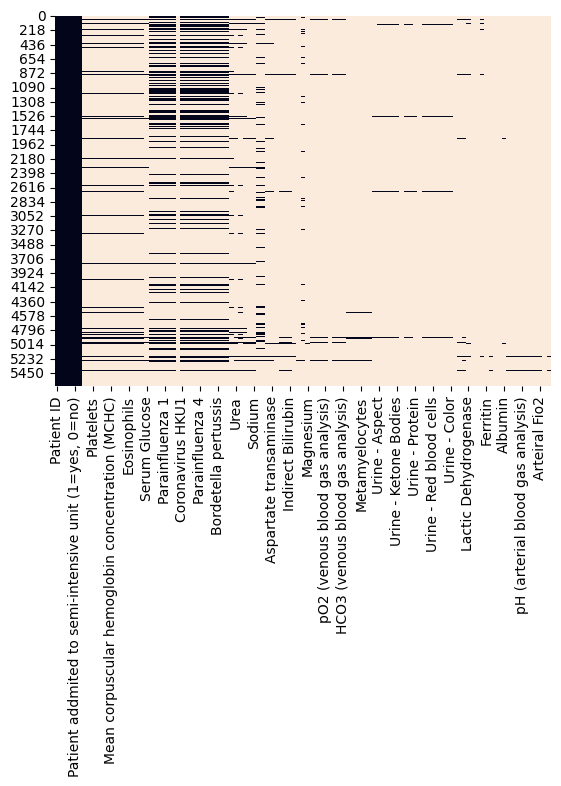

In [14]:
sns.heatmap(df.isna(), cbar=False)

In [21]:
(df.isna().sum()/df.shape[0]).sort_values(ascending = True)

Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Partial thromboplastin time (PTT)                        1.0
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
D-Dimer                                                  1.0
Prothrombin time (PT), Activity                          1.0
Length: 111, dtype: float64

ANALYSE DE FONDS :   
élimination des colonnes inutiles

In [28]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]
df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...    Adenovirus  \
0            NaN        NaN                    NaN  ...           NaN   
1      -0.022340  -0.517413               0.010677  ...  not_detected   
2            NaN        NaN                    NaN  ...           NaN   
3            NaN        NaN                    NaN  ...           NaN   
4            NaN        NaN                    NaN  ...  not_detected   
...          ...        ...                    ...  ...           ...   
5639         NaN        NaN                    NaN  ...           NaN   
5640         NaN        NaN                    NaN  ...           NaN   
5641         NaN        NaN                    NaN  ...           NaN   
5642         NaN        NaN                    NaN  ...           NaN   
5643    0.541564  -0.906829         

In [29]:
df = df.drop('Patient ID', axis=1)
df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5639                     3               positive   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0            NaN        NaN                    NaN              NaN  ...   
1      -0.022340  -0.517413               0.010677         0.102004  ...   
2            NaN        NaN                    NaN              NaN  ...   
3            NaN        NaN                    NaN              NaN  ...   
4            NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5639         NaN        NaN                    NaN              NaN  ...   
5640         NaN        NaN                    NaN              NaN  ...   
5641         NaN        NaN                    NaN              NaN  ...   
5642         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

        Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
0              NaN              NaN              NaN

Examen de la colonne target

In [30]:
df['SARS-Cov-2 exam result']

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5639    positive
5640    negative
5641    negative
5642    negative
5643    positive
Name: SARS-Cov-2 exam result, Length: 5644, dtype: object

In [32]:
df['SARS-Cov-2 exam result'].value_counts(normalize = True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

**Histogrames des Variables Continues**

<ipython-input-34-30ee2a4aaae2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-34-30ee2a4aaae2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-34-30ee2a4aaae2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

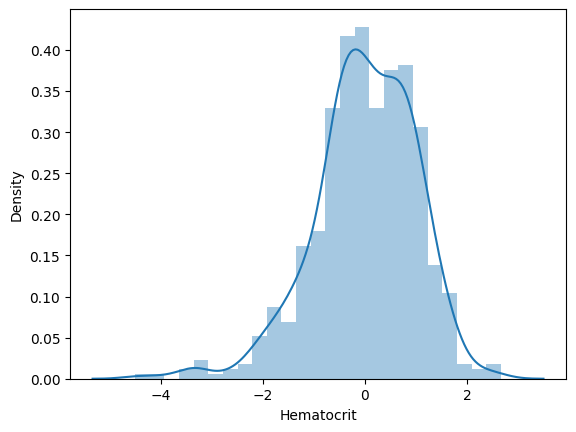

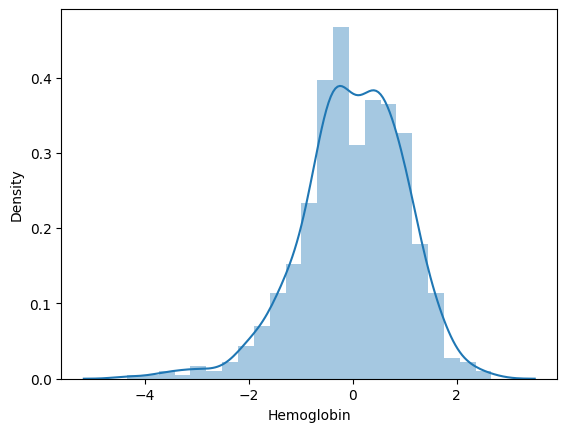

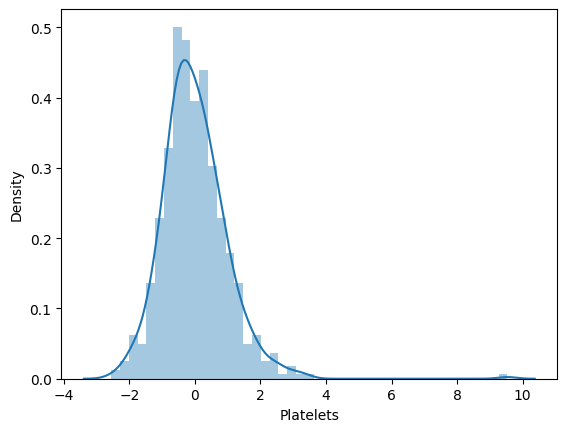

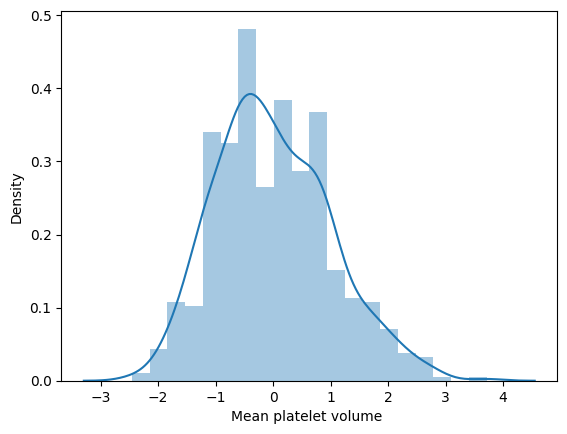

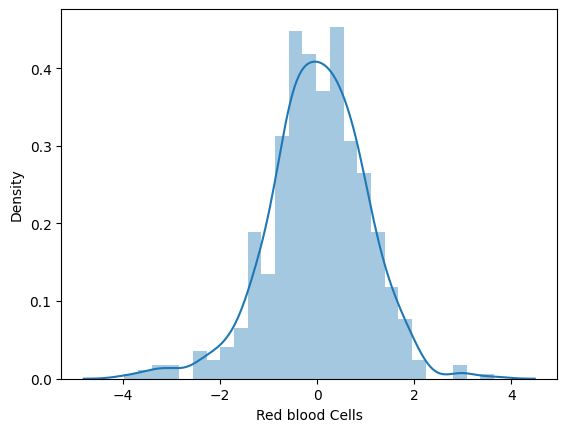

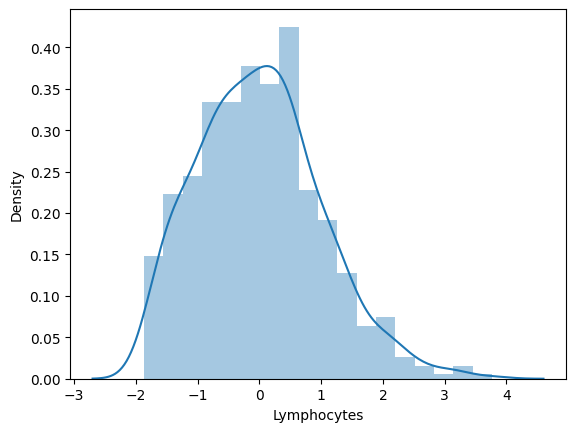

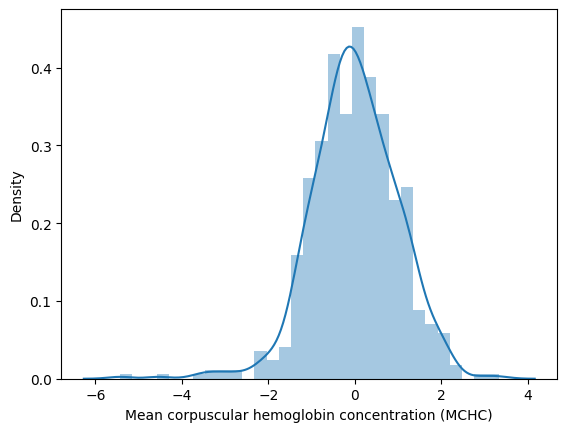

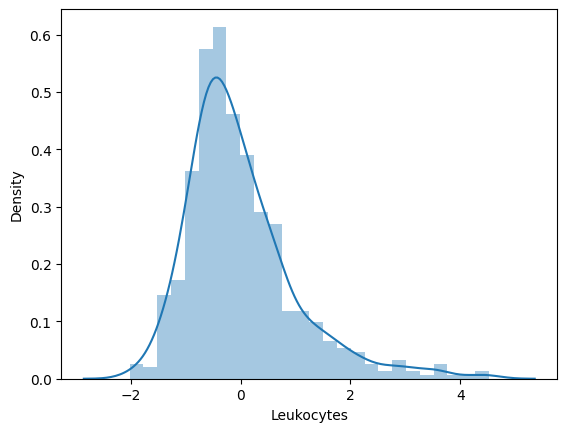

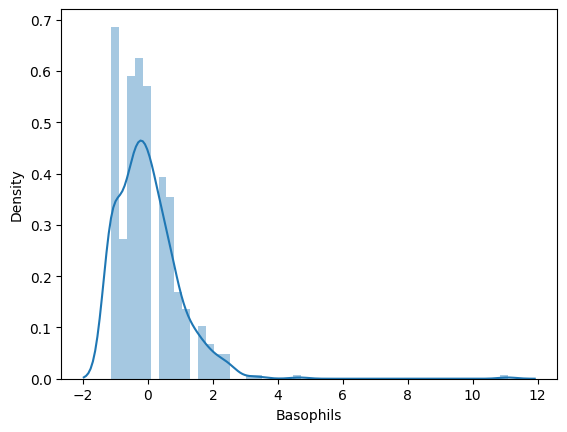

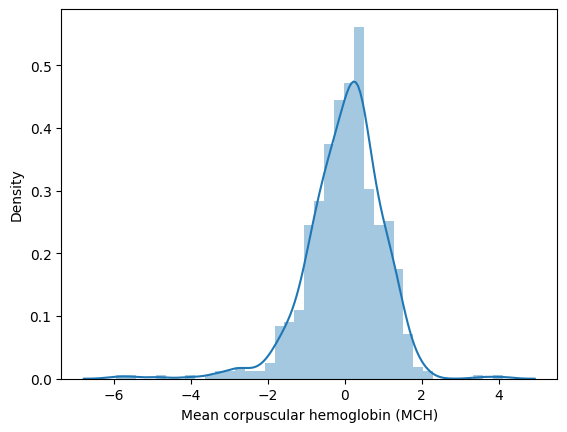

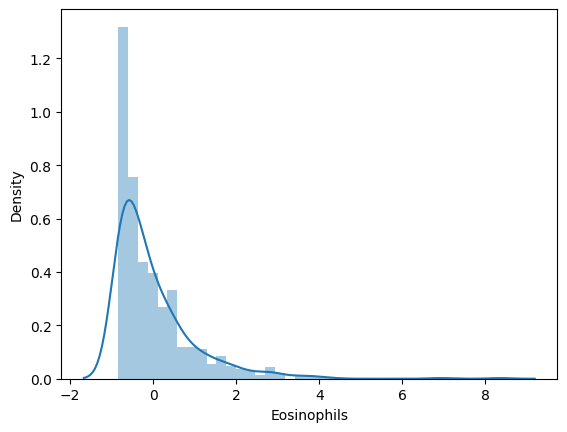

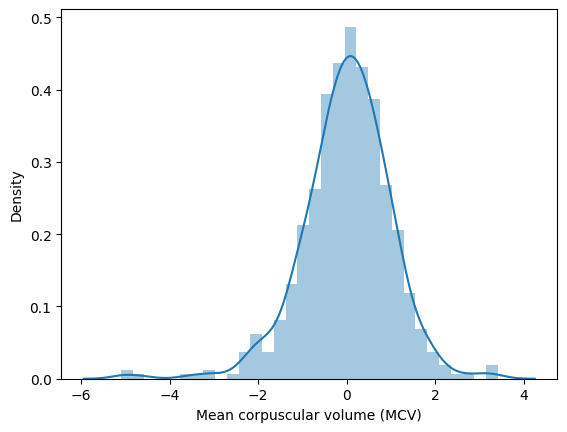

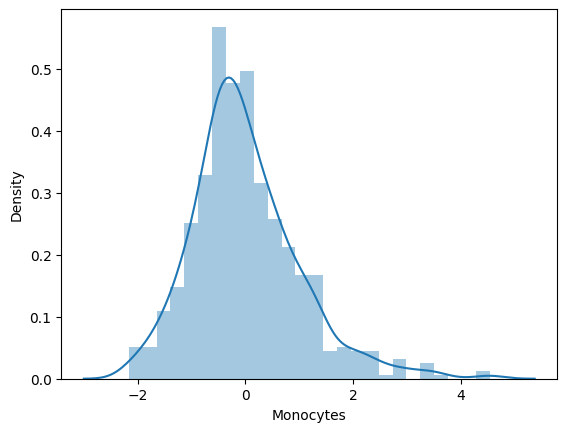

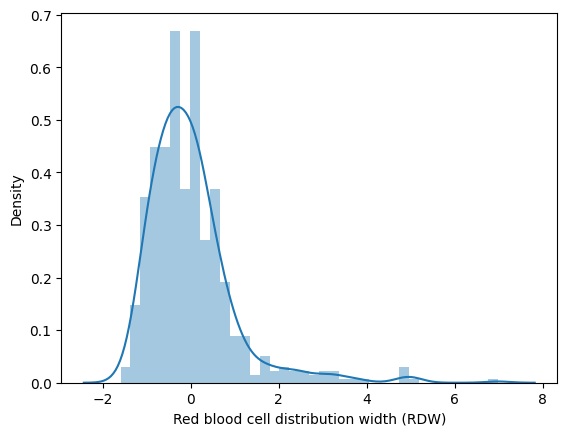

In [34]:
for col in df.select_dtypes('float'):
  plt.figure()
  sns.distplot(df[col])

<ipython-input-35-c851ed34b0f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Patient age quantile'])


<Axes: xlabel='Patient age quantile', ylabel='Density'>

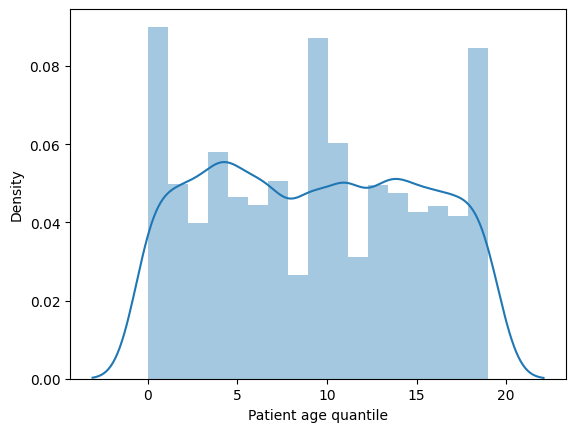

In [35]:
sns.distplot(df['Patient age quantile'])

In [36]:
df['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

Variables Qualitatives

In [37]:
df['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [39]:
for col in df.select_dtypes('object'):
  print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

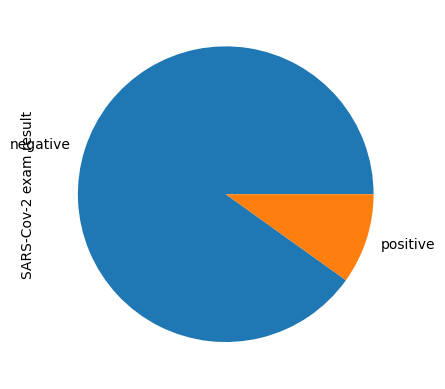

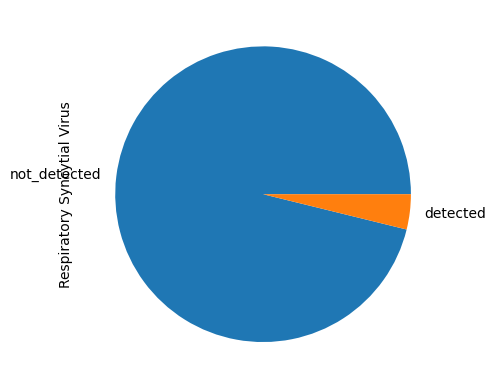

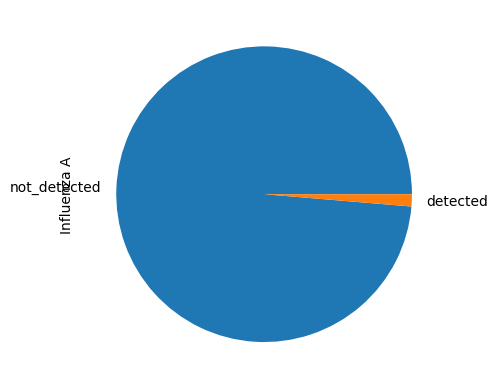

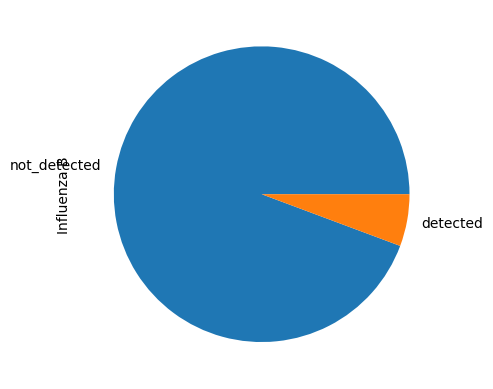

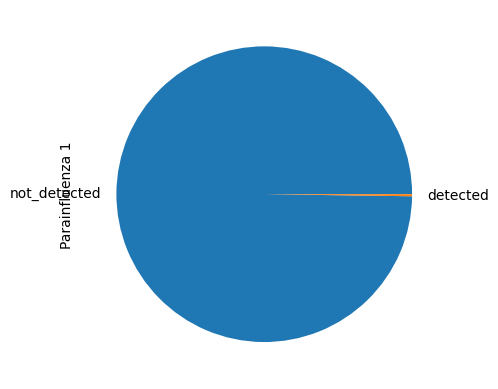

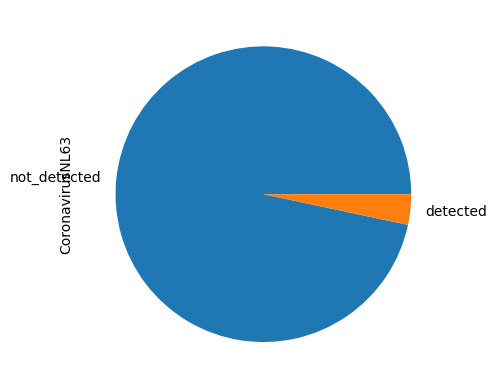

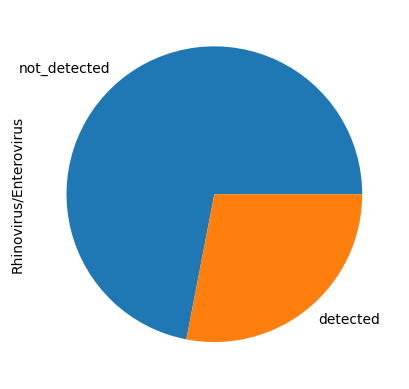

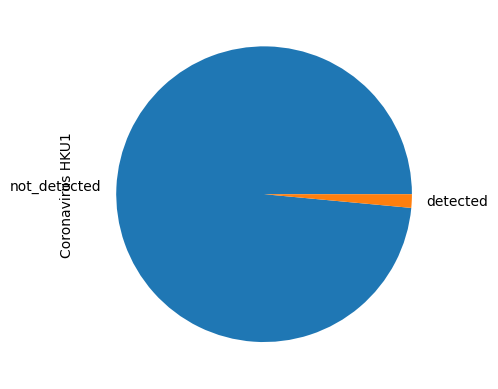

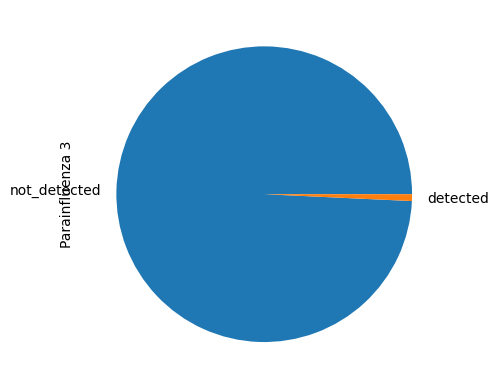

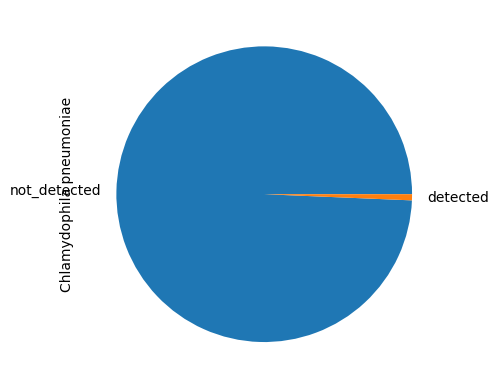

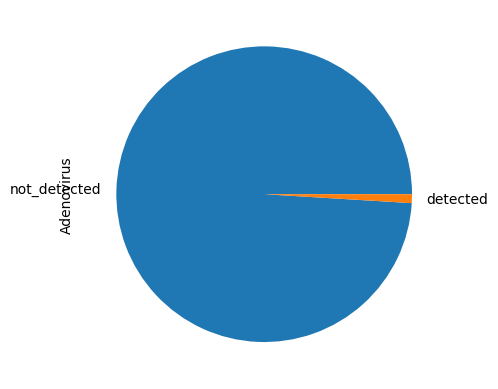

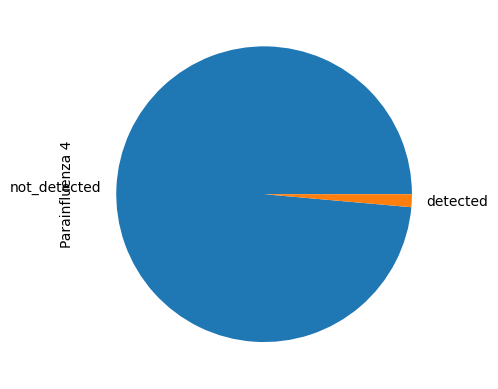

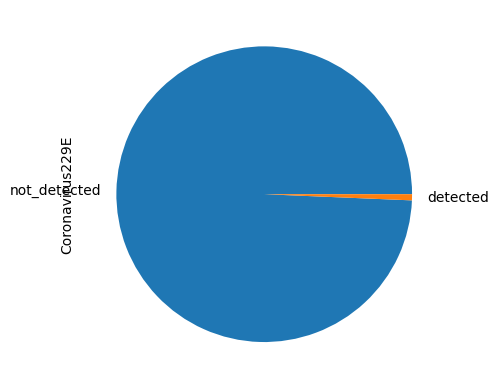

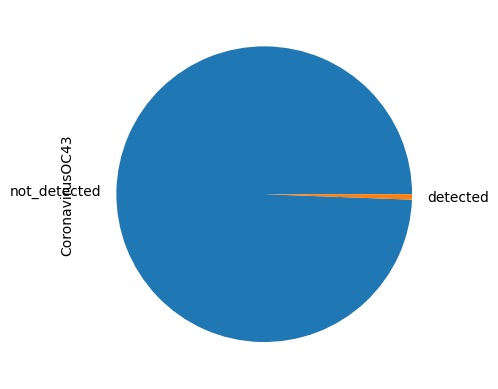

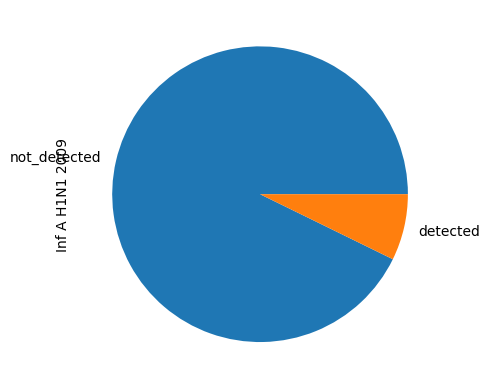

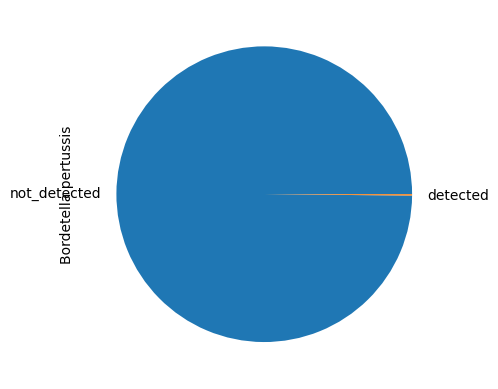

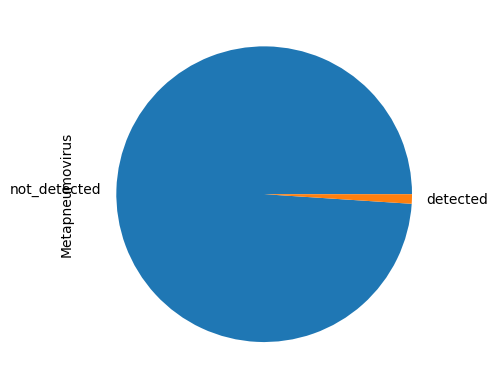

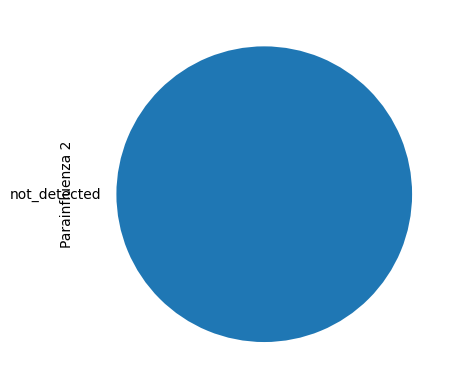

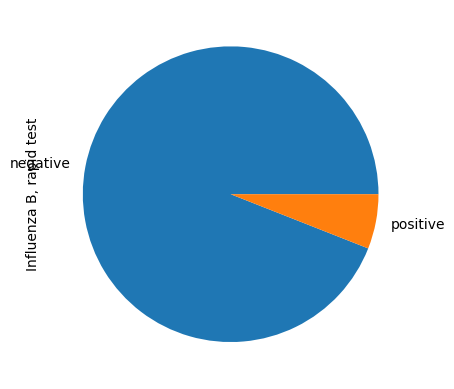

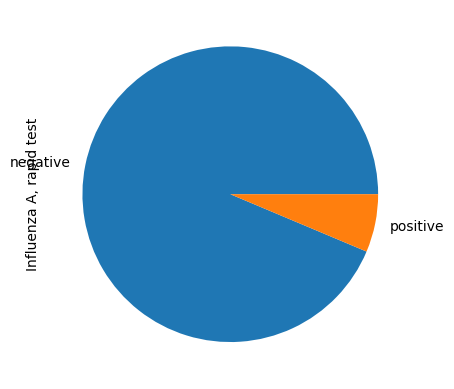

In [40]:
for col in df.select_dtypes('object'):
  plt.figure()
  df[col].value_counts().plot.pie()


# Relation Target/Variables

Création de sous ensembles positifs et négatifs

In [51]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
positive_df

Patient age quantile SARS-Cov-2 exam result  \
67                       7               positive   
284                     16               positive   
513                     10               positive   
568                      2               positive   
676                     15               positive   
...                    ...                    ...   
5632                    16               positive   
5633                     4               positive   
5634                    15               positive   
5639                     3               positive   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
67           NaN        NaN                    NaN              NaN  ...   
284          NaN        NaN                    NaN              NaN  ...   
513          NaN        NaN                    NaN              NaN  ...   
568     0.792188  -0.341548               1.469188         1.653476  ...   
676          NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5632         NaN        NaN                    NaN              NaN  ...   
5633         NaN        NaN                    NaN              NaN  ...   
5634         NaN        NaN                    NaN              NaN  ...   
5639         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

        Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
67             NaN              NaN              NaN

In [52]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']
negative_df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5637                    12               negative   
5638                    14               negative   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5637                                               0   
5638                                               0   
5640                                               0   
5641                                               0   
5642                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5637                                                  0       
5638                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5637                                                  0             NaN   
5638                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0            NaN        NaN                    NaN              NaN  ...   
1       -0.02234  -0.517413               0.010677         0.102004  ...   
2            NaN        NaN                    NaN              NaN  ...   
3            NaN        NaN                    NaN              NaN  ...   
4            NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5637         NaN        NaN                    NaN              NaN  ...   
5638         NaN        NaN                    NaN              NaN  ...   
5640         NaN        NaN                    NaN              NaN  ...   
5641         NaN        NaN                    NaN              NaN  ...   
5642         NaN        NaN                    NaN              NaN  ...   

        Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
0              NaN              NaN              NaN

Création des ensembles test sangins / tests virals

In [44]:
missing_rate = df.isna().sum()/df.shape[0]

In [48]:
blood_df = df.columns[(missing_rate<0.9) & (missing_rate > 0.88)]
blood_df

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [47]:
viral_df = df.columns[(missing_rate> 0.75) & (missing_rate<0.88)]
viral_df

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

Target /blood

<ipython-input-54-183394754b7b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label='positive')
<ipython-input-54-183394754b7b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], label='negative')
<ipython-input-54-183394754b7b>:3: UserWarning: 

`distplot` i

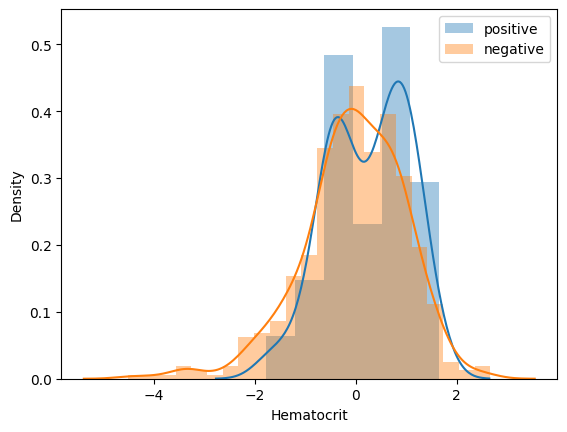

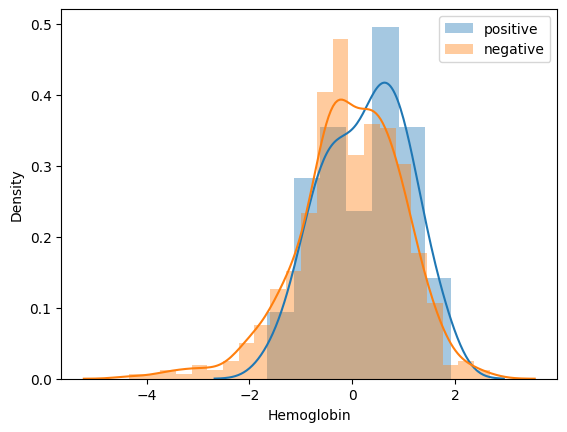

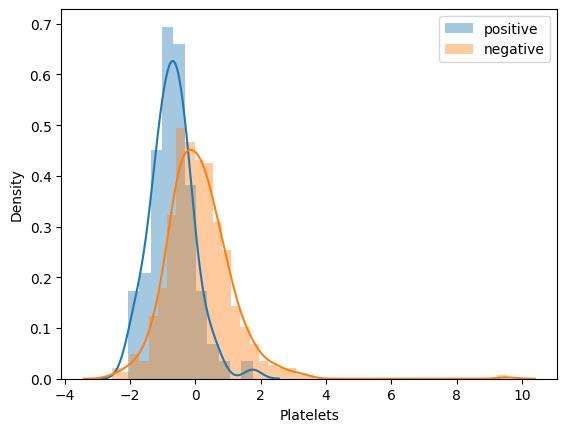

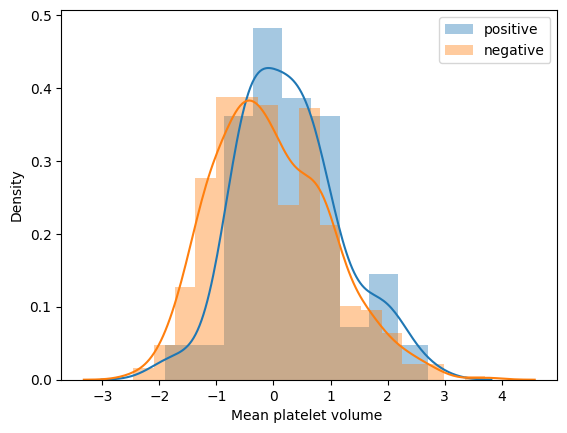

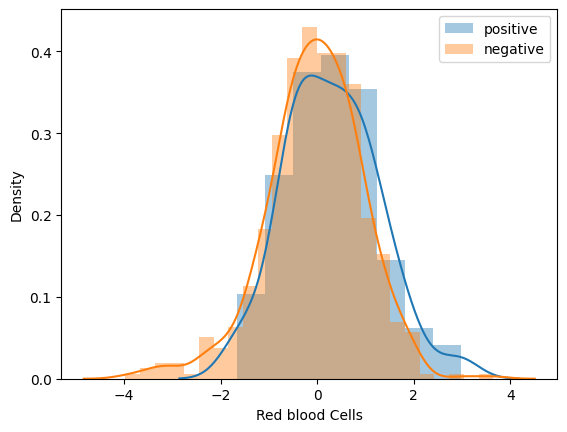

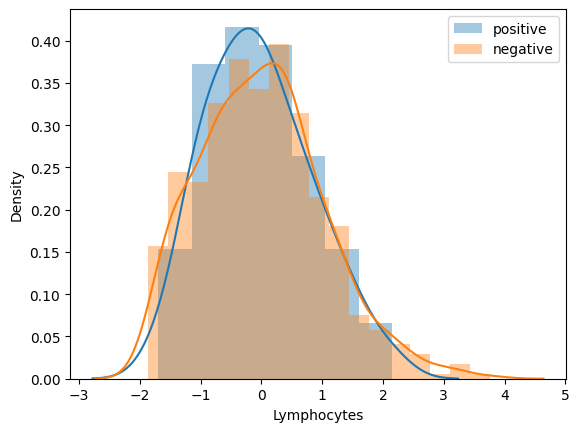

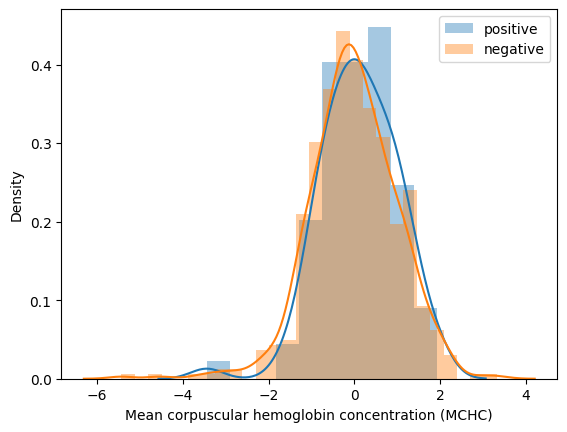

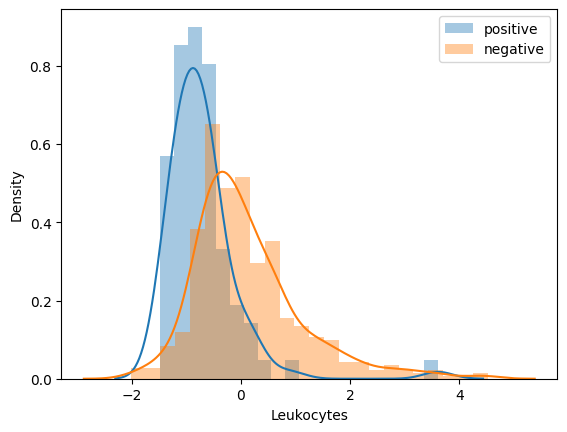

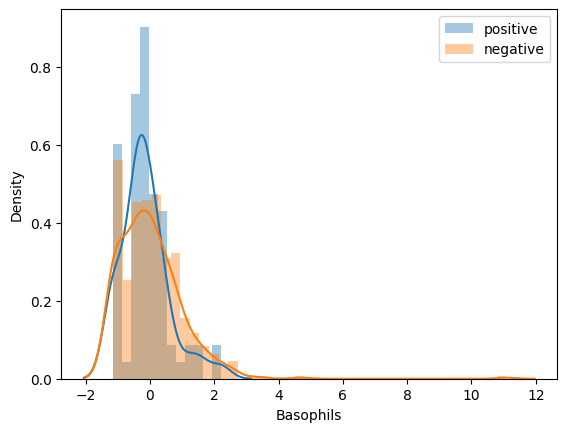

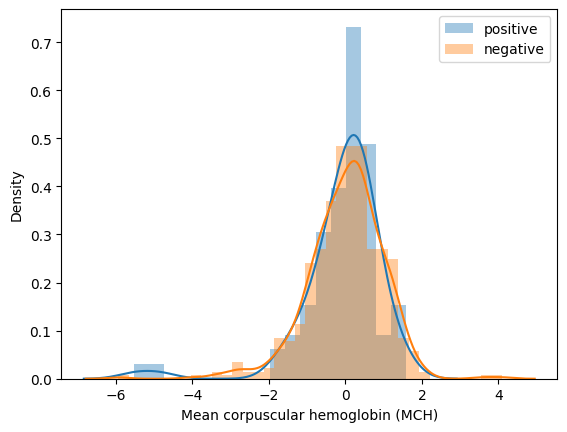

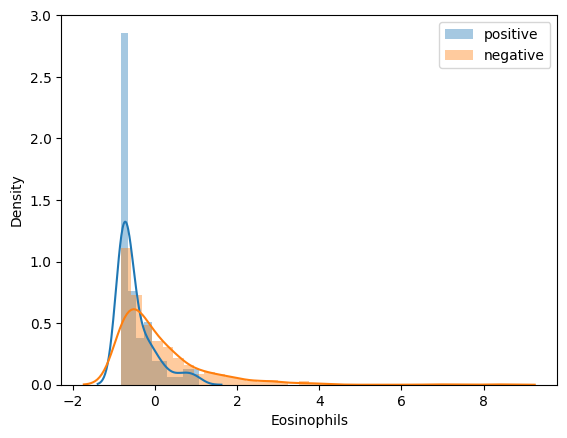

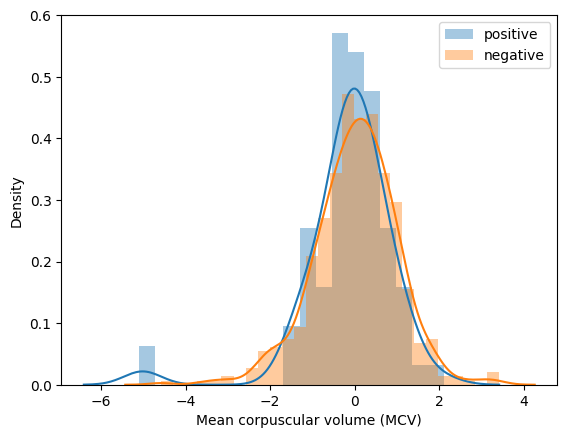

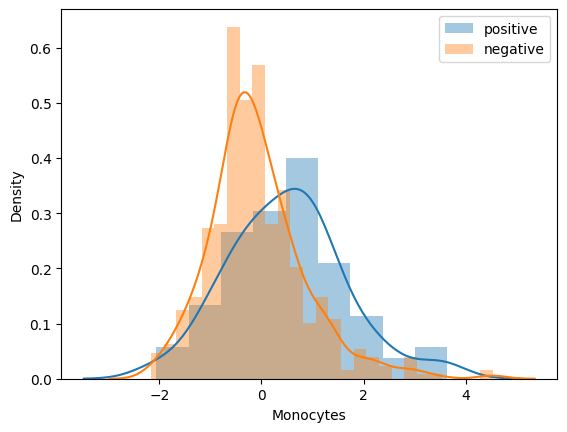

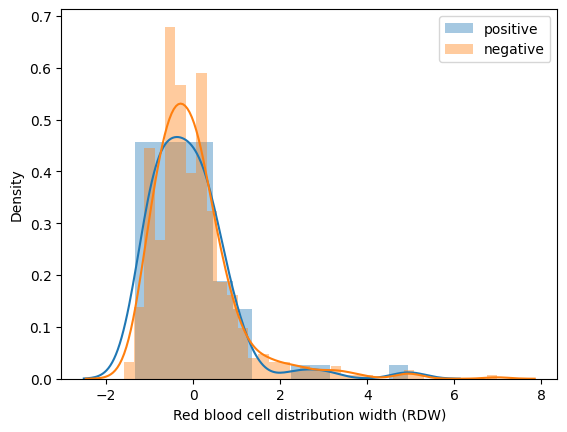

In [54]:
for col in blood_df:
  plt.figure()
  sns.distplot(positive_df[col], label='positive')
  sns.distplot(negative_df[col], label='negative')
  plt.legend()

Relation Target/age

<Axes: xlabel='Patient age quantile', ylabel='count'>

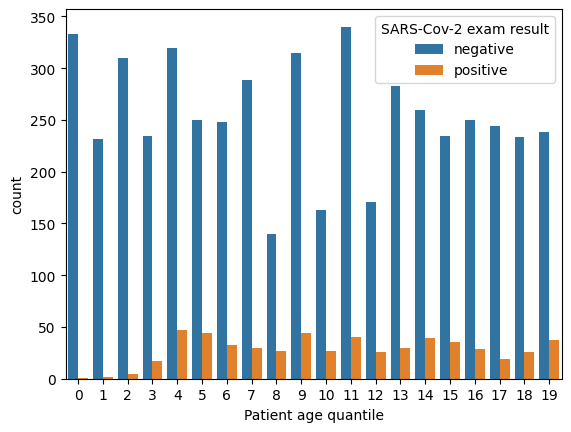

In [57]:
sns.countplot(x= 'Patient age quantile', hue='SARS-Cov-2 exam result', data= df)


Relation Target/ Viral

In [58]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

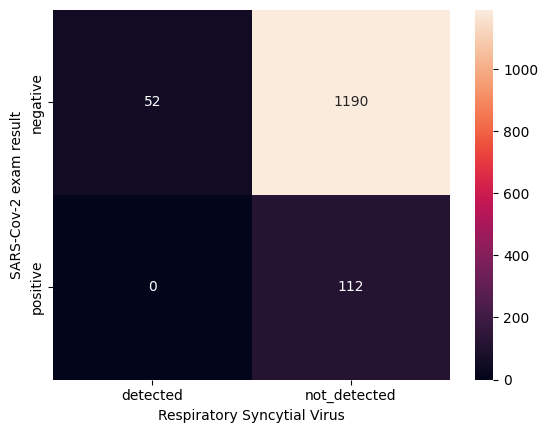

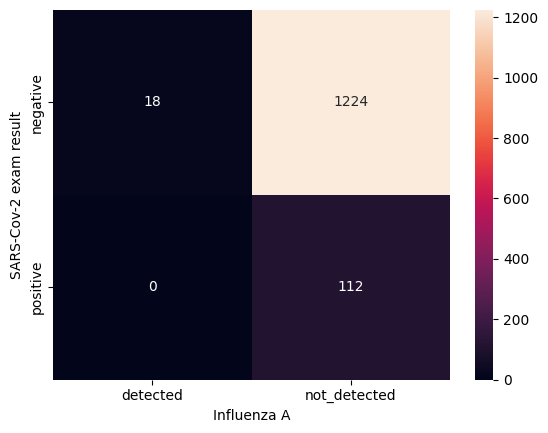

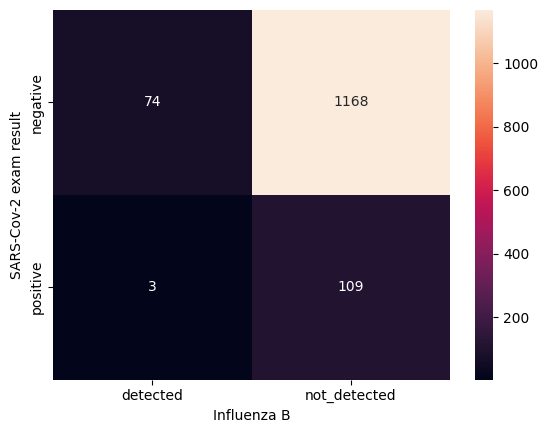

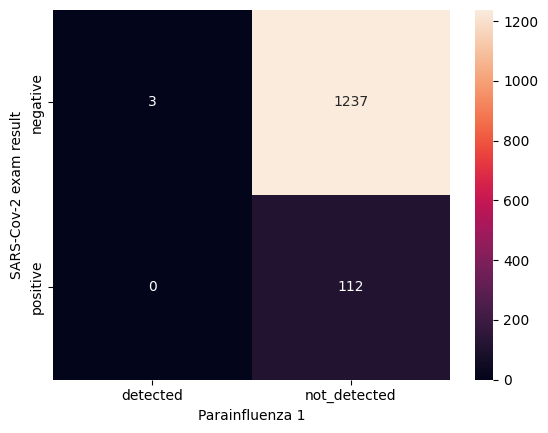

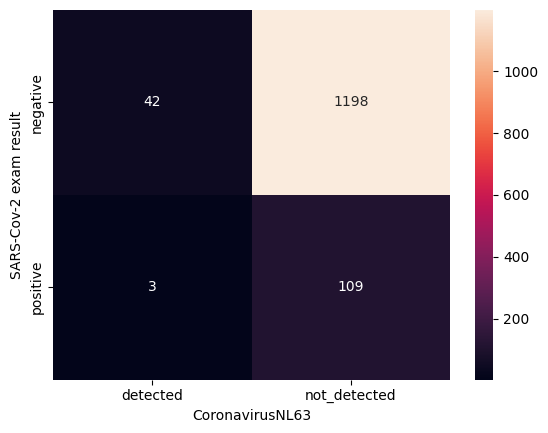

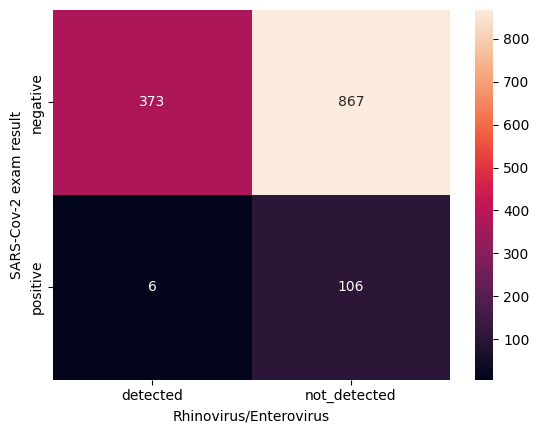

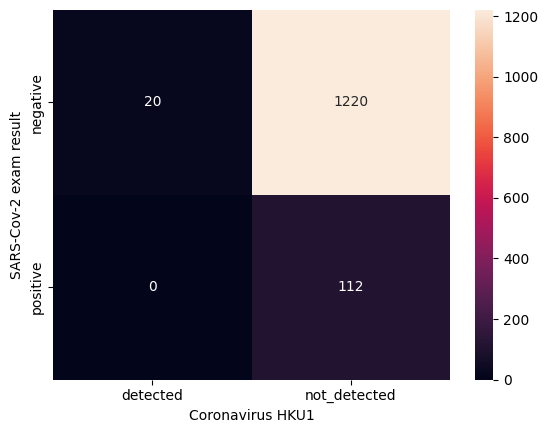

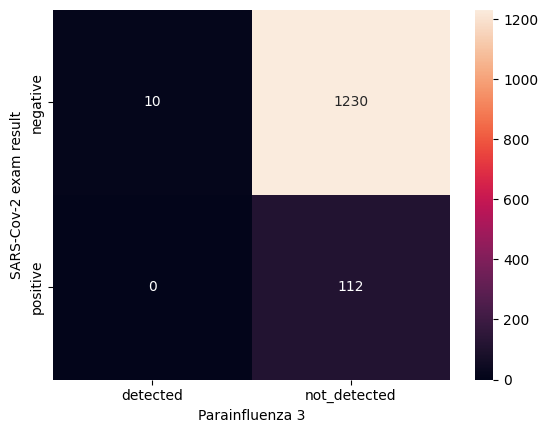

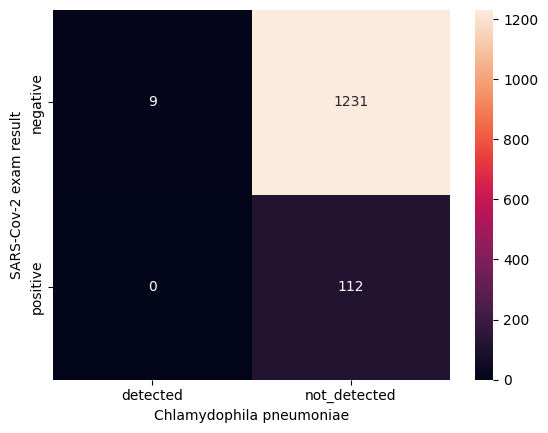

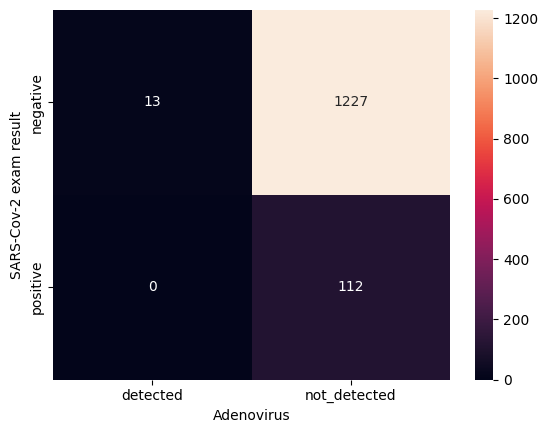

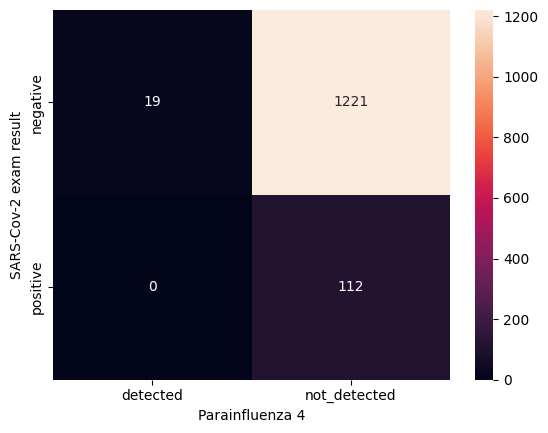

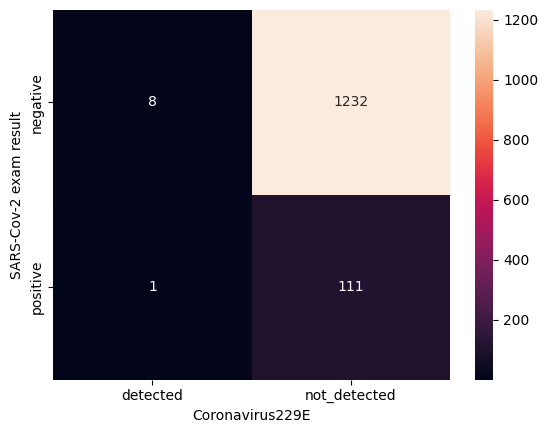

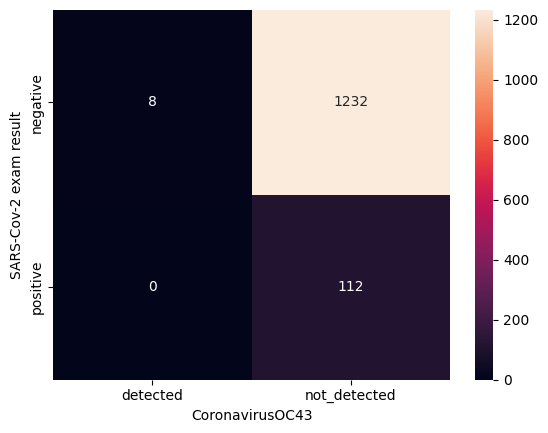

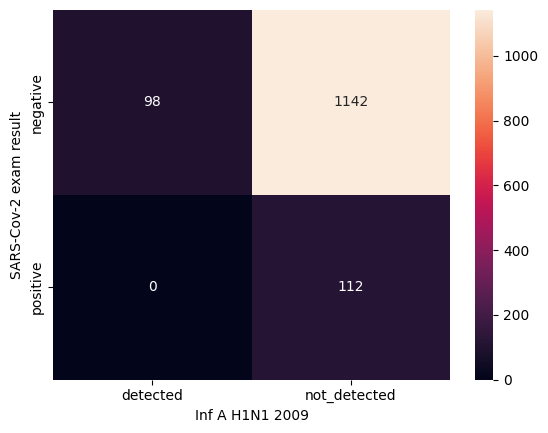

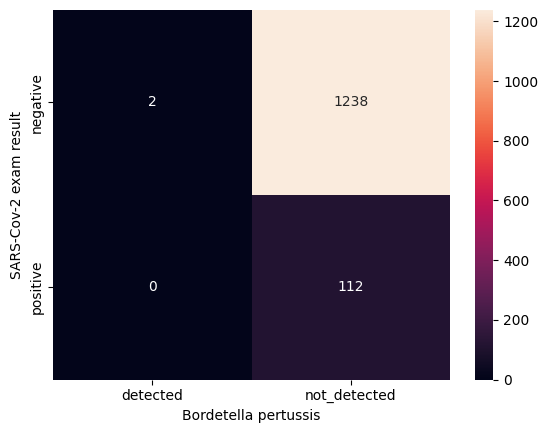

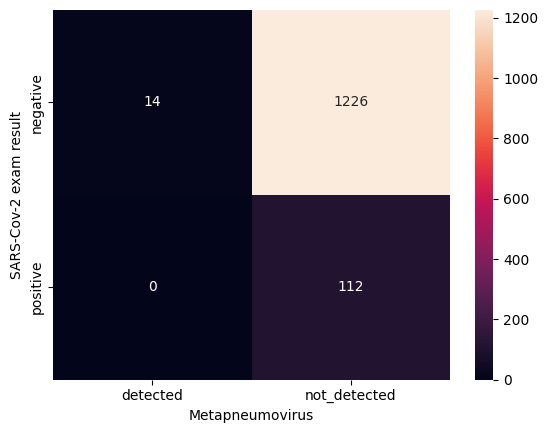

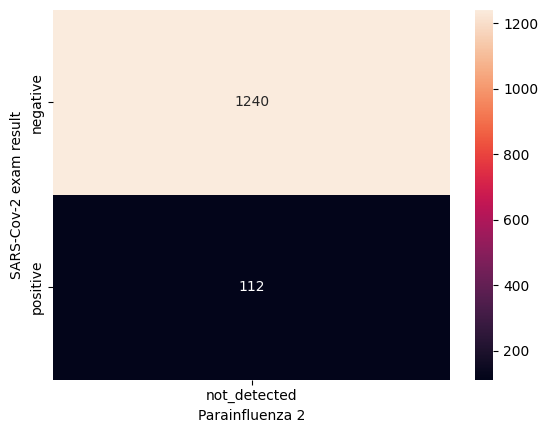

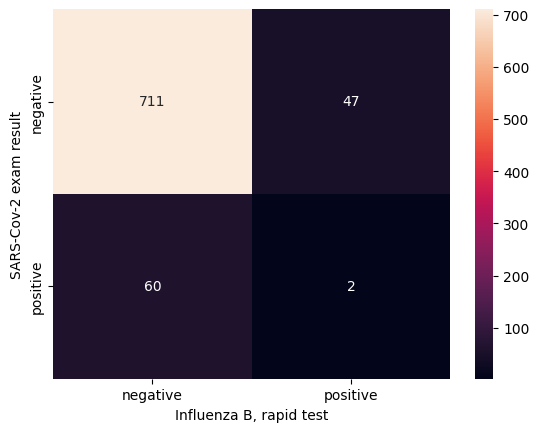

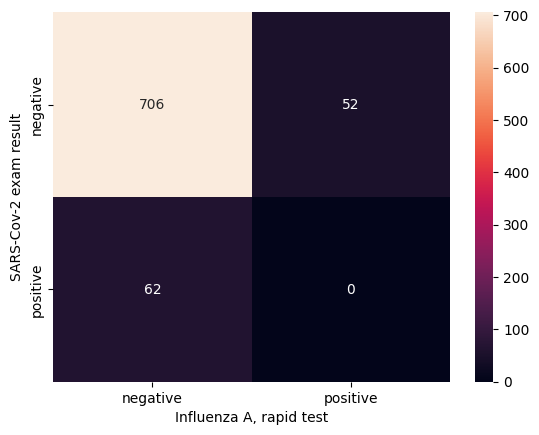

In [60]:
for col in viral_df:
  plt.figure()
  sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

# Analyse plus détaillée
**Relation variables/ Variables :**
*   Blood_data/blood_data : certaine variables sont trés corrélées : +0.9 ( à surveiller plus tard)
*   Blood_data/age : trés faible corrélation entre age et taux sangins
*   viral/viral : Rapid test est peut fiable vaut mieux le laisser tomber
*   relation maladie / blood_data: les taux sangins entre malades et covid19 sont differents
*   relation hospitalisation / est malade
*   relation hospitalisation / blood: intéressant dans le cas ou on pourra prédire dans quelle service un patient devrait aller

**NaN analyse**
viral : 1350(92/8), blood : 600(87/13), both : 90
**Hypothése nulle H0**

*   les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement different

H0 : les taux moyens de ces mesures sont égaux chez les individus positifs et négatifs

d'aprés le T_test H0 est rejetée

*   les individus atteints d'une maladie quelconque ont des taux significativement differents






**relation taux sangins**

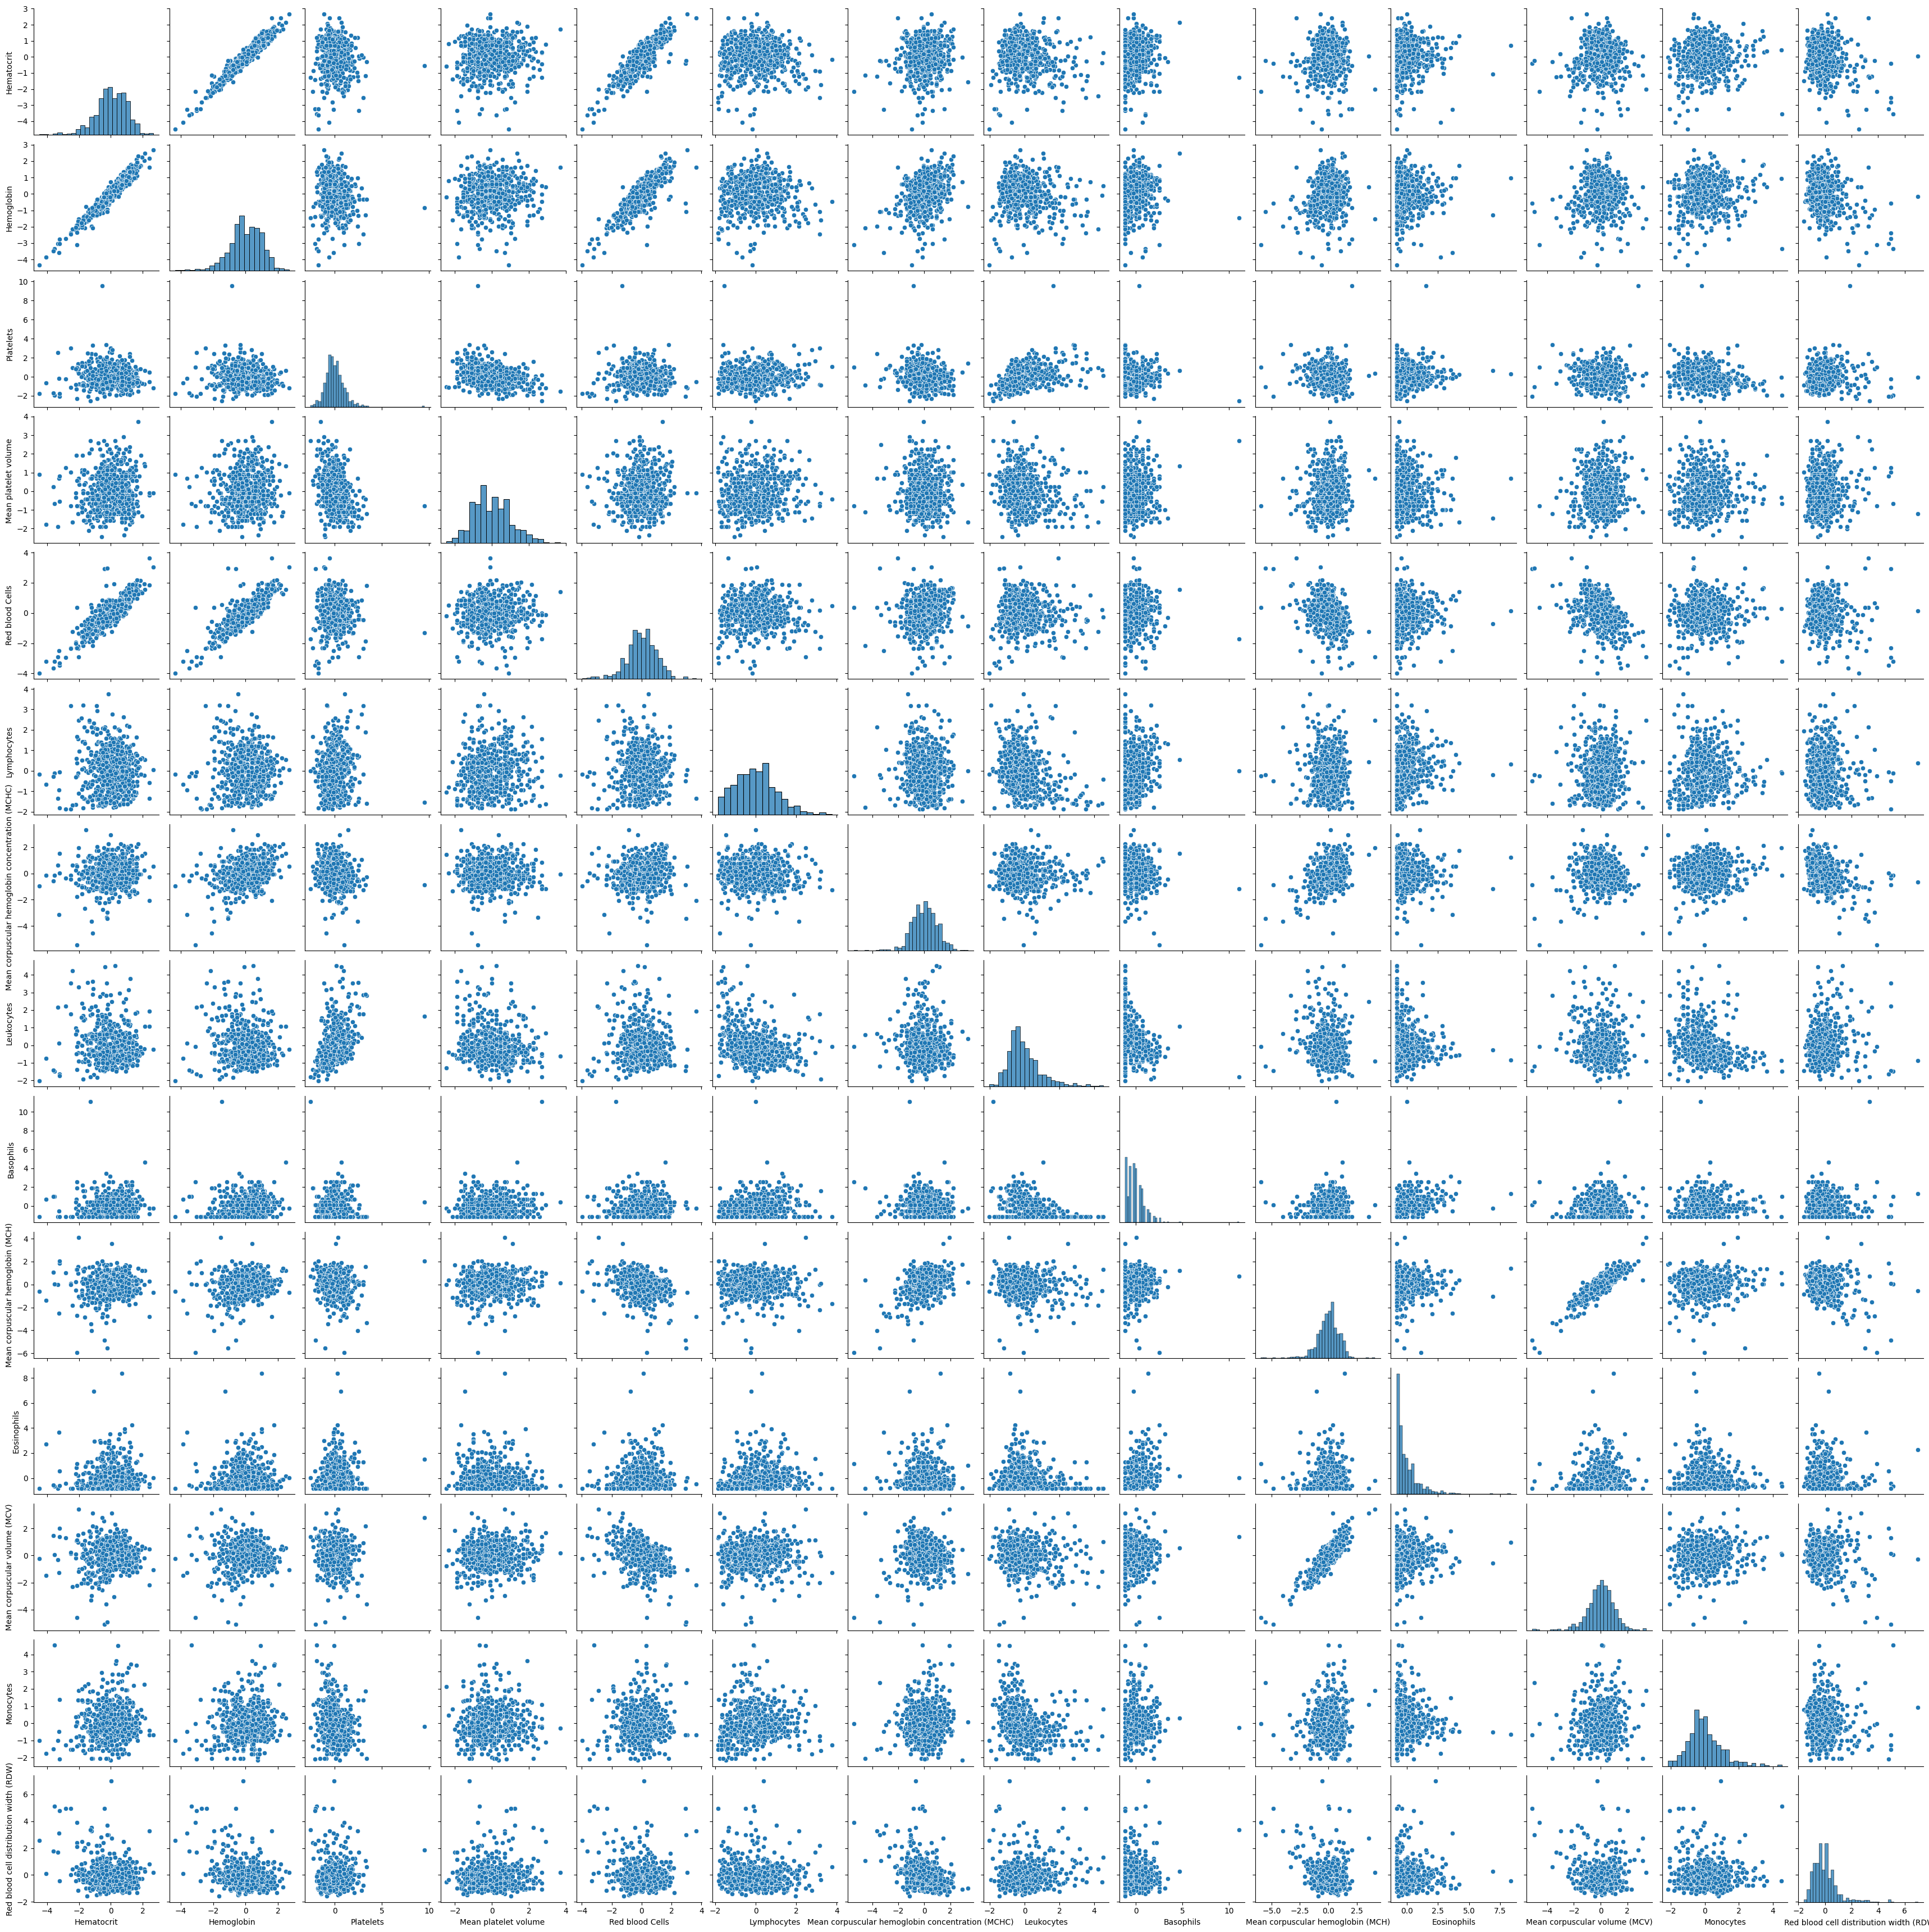

In [61]:
sns.pairplot(df[blood_df])

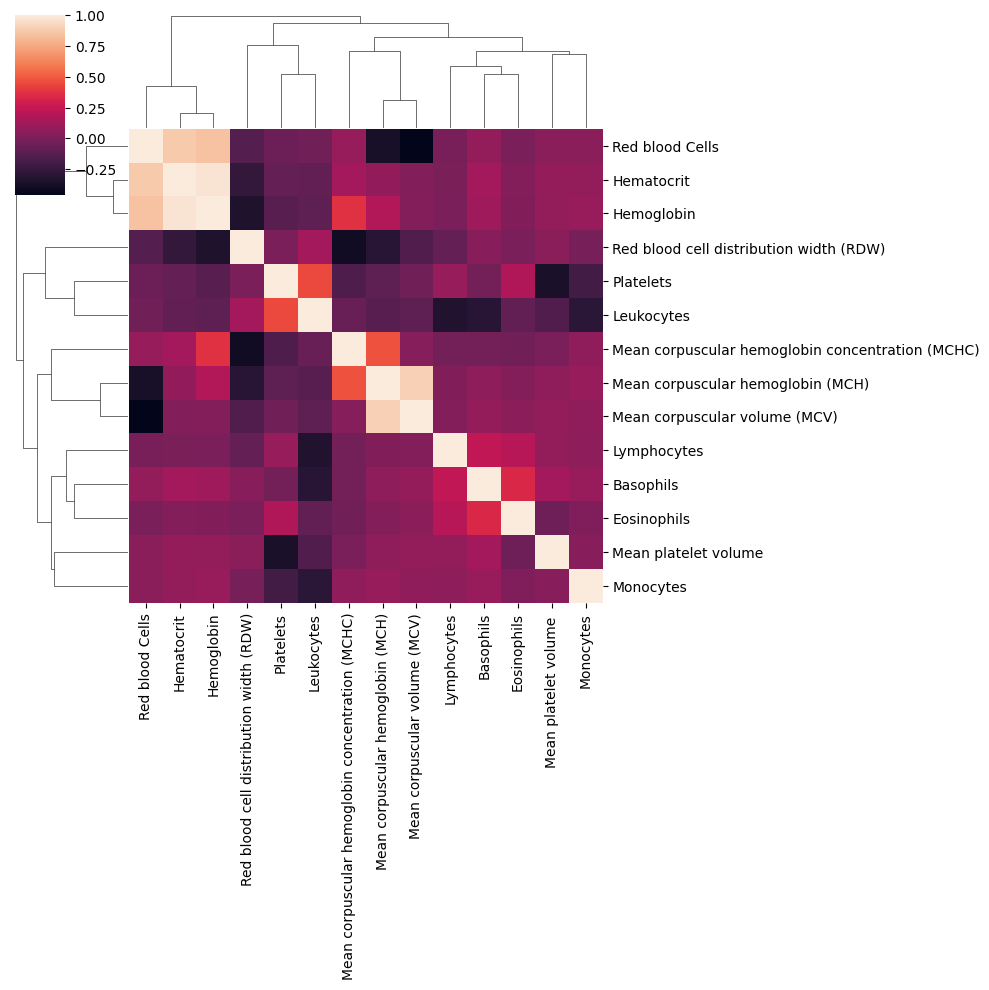

In [63]:
sns.clustermap(df[blood_df].corr())

**Relation Age /sang**

<ipython-input-64-d4914619dc47>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

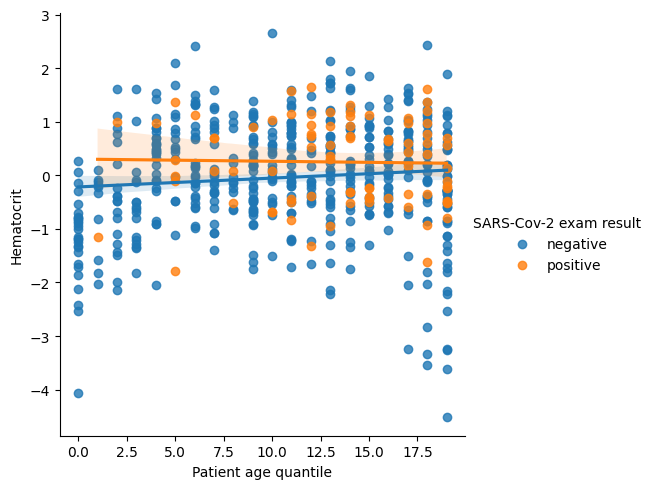

<Figure size 640x480 with 0 Axes>

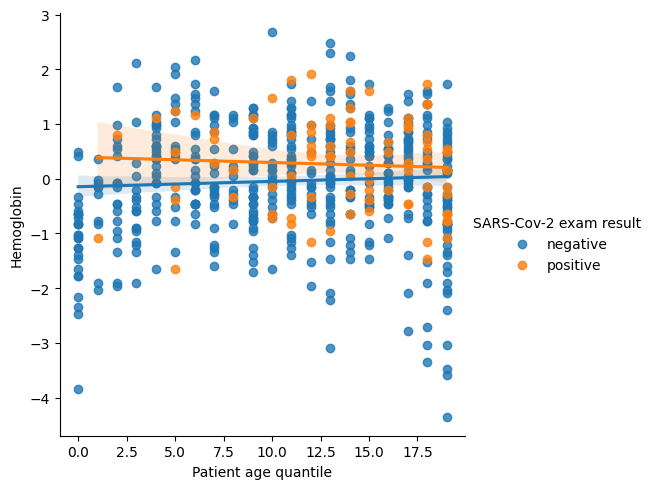

<Figure size 640x480 with 0 Axes>

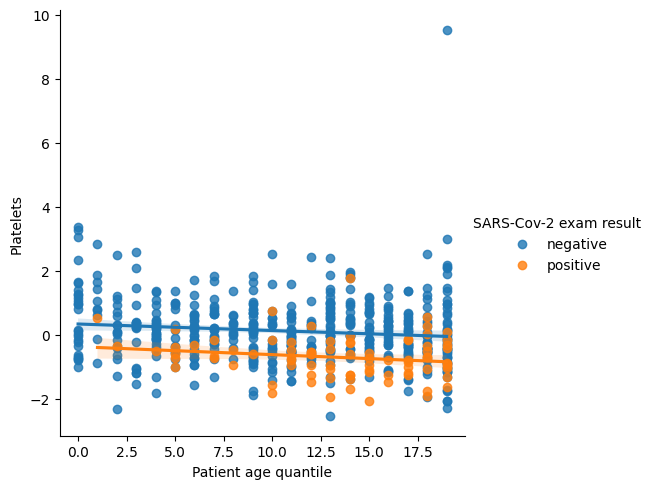

<Figure size 640x480 with 0 Axes>

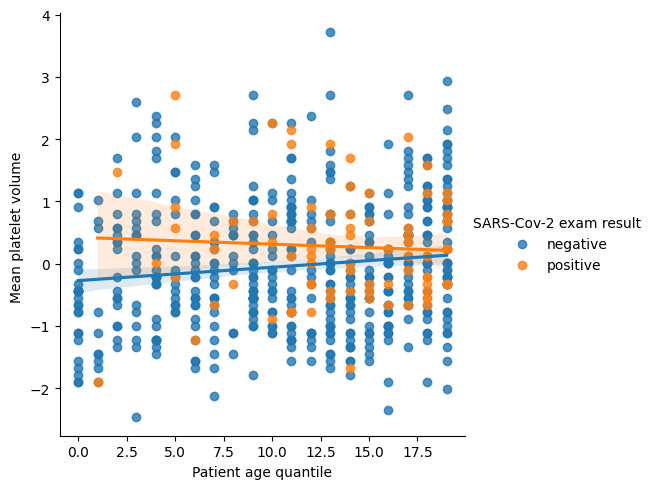

<Figure size 640x480 with 0 Axes>

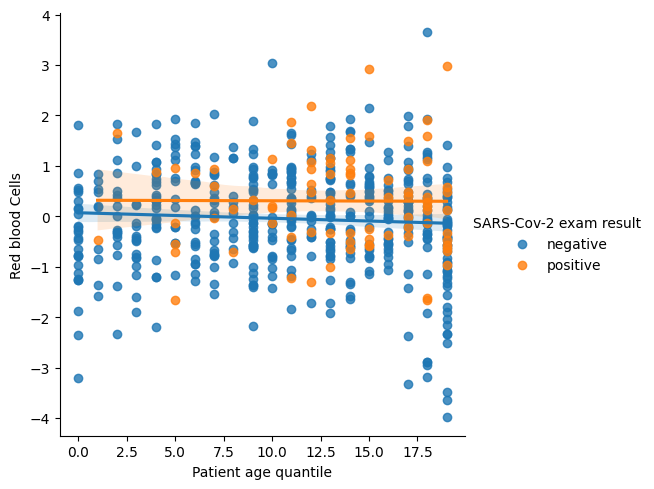

<Figure size 640x480 with 0 Axes>

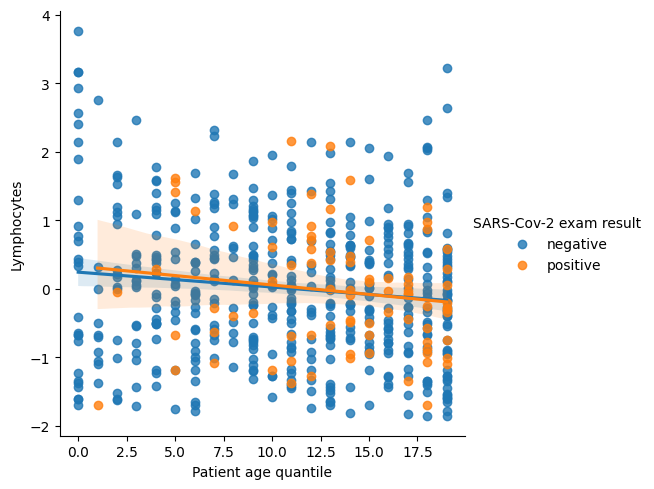

<Figure size 640x480 with 0 Axes>

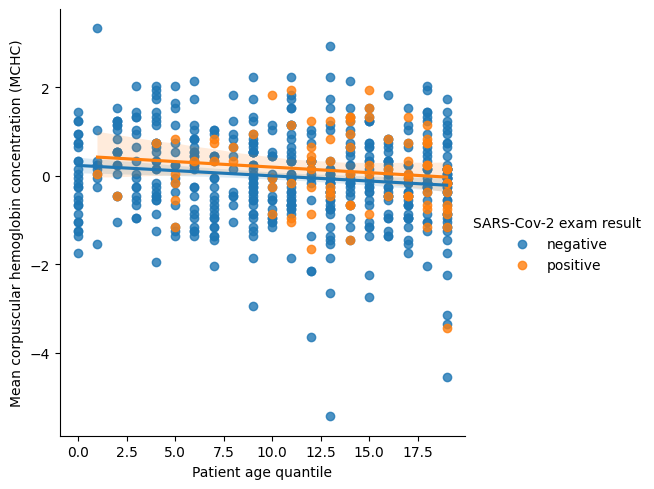

<Figure size 640x480 with 0 Axes>

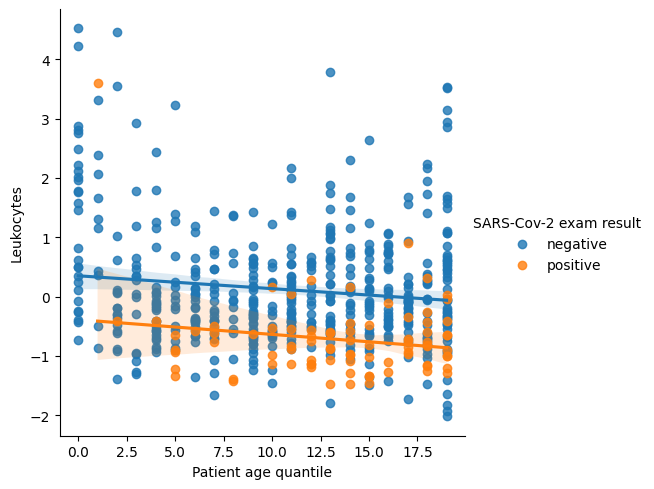

<Figure size 640x480 with 0 Axes>

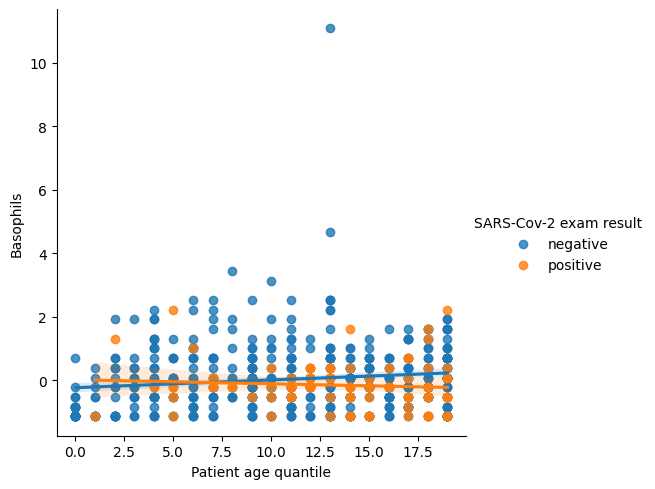

<Figure size 640x480 with 0 Axes>

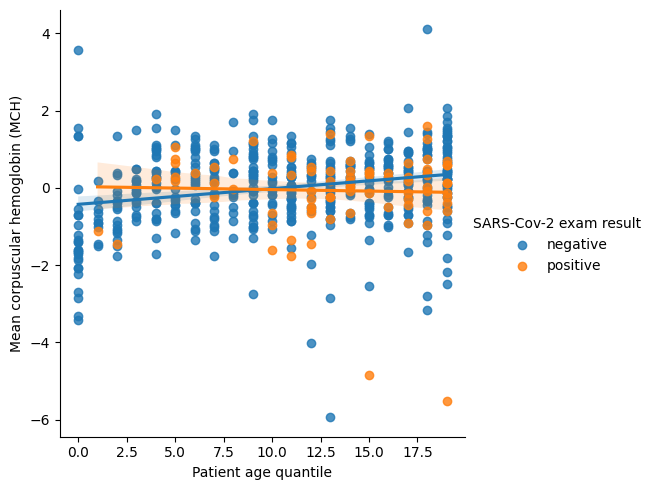

<Figure size 640x480 with 0 Axes>

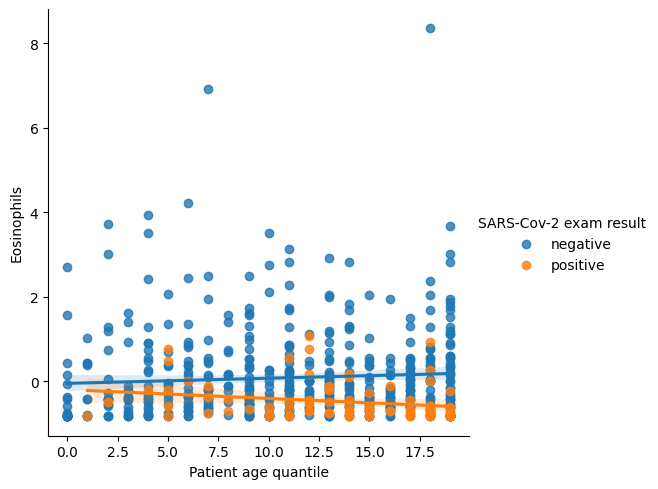

<Figure size 640x480 with 0 Axes>

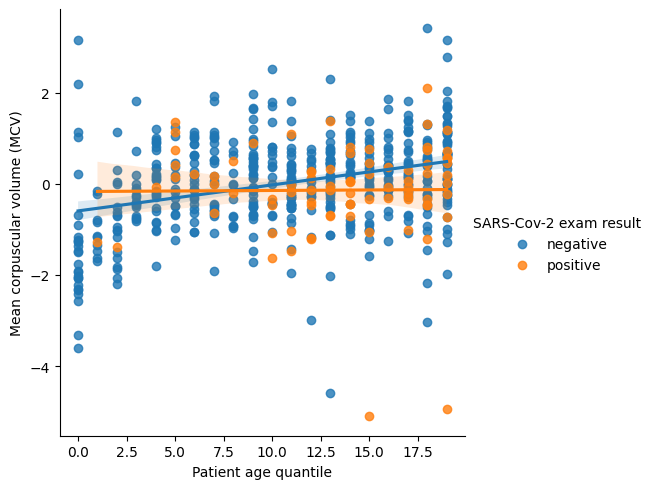

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

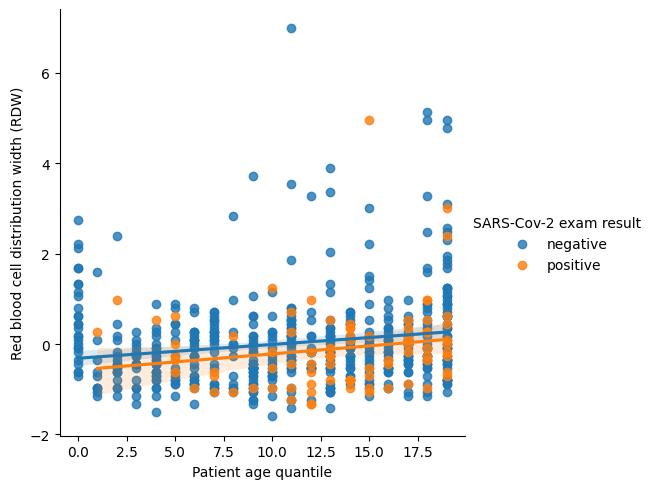

In [64]:
for col in blood_df:
  plt.figure()
  sns.lmplot(x = "Patient age quantile", y = col, hue='SARS-Cov-2 exam result', data=df)

In [66]:
df.corr()['Patient age quantile'].sort_values()

<ipython-input-66-86652074ce4b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Patient age quantile'].sort_values()


Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

**Relation viral/viral**

relation entre Influenza et Rapid test

In [68]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [70]:
pd.crosstab(df['Influenza B'],df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

**Relation Viral / sangin**

création d'une variable "est malade"

In [73]:
df['est malade']=np.sum(df[viral_df[:-2]] == "detected", axis=1) >=1
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0                   NaN              NaN              NaN   
1          not_detected     not_detected     not_detected   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4          not_detected     not_detected     not_detected   

   Influenza B, rapid test  Influenza A, rapid test est malade  
0                      NaN                      NaN      False  
1                 negative                 negative       True  
2                      NaN                      NaN      False  
3                      NaN                      NaN      False  
4                      NaN                      NaN       True  

[5 rows x 39 columns]

In [74]:
malade_df = df[df['est malade']==True]
non_malade_df = df[df['est malade']==False]

<ipython-input-78-feb40244161a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label='malade')
<ipython-input-78-feb40244161a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], label='non malade')
<ipython-input-78-feb40244161a>:3: UserWarning: 

`distplot` i

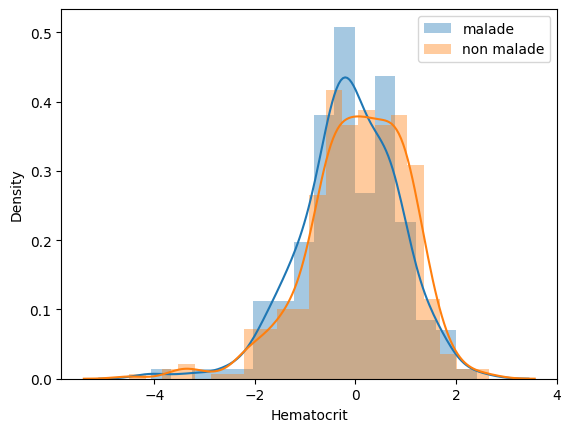

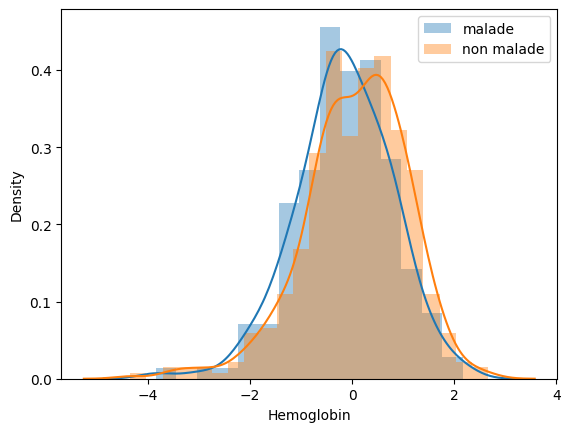

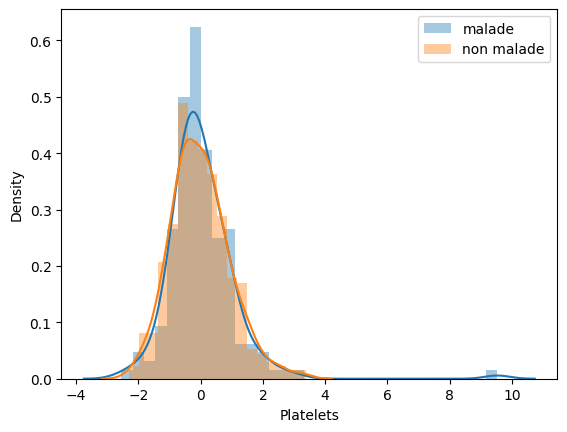

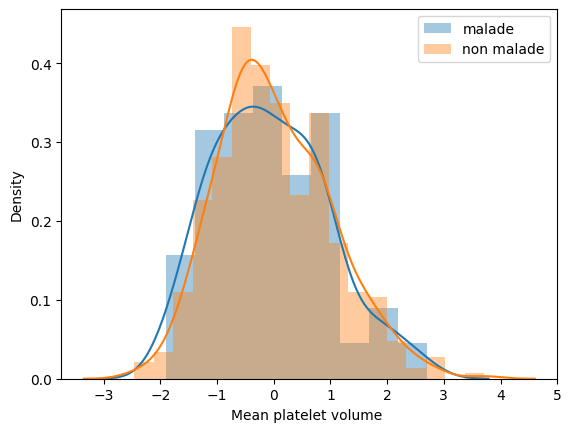

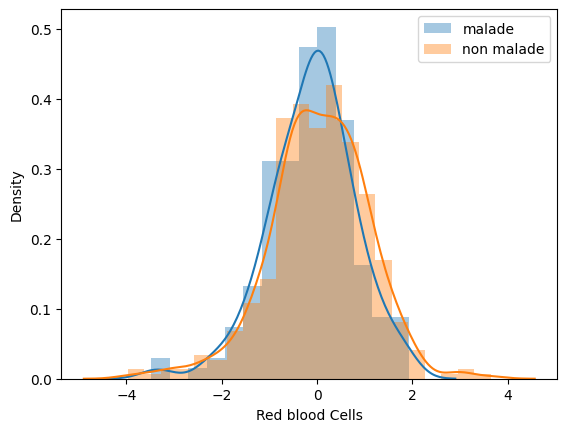

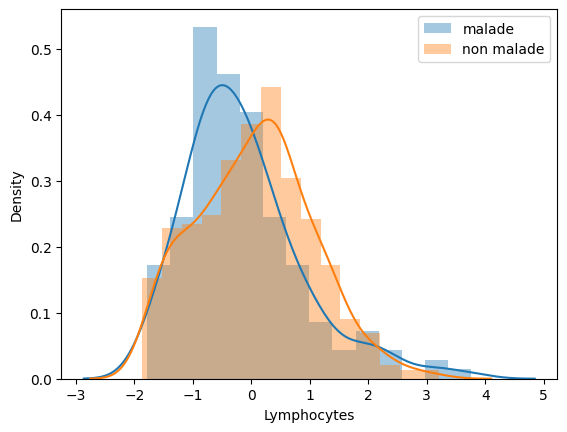

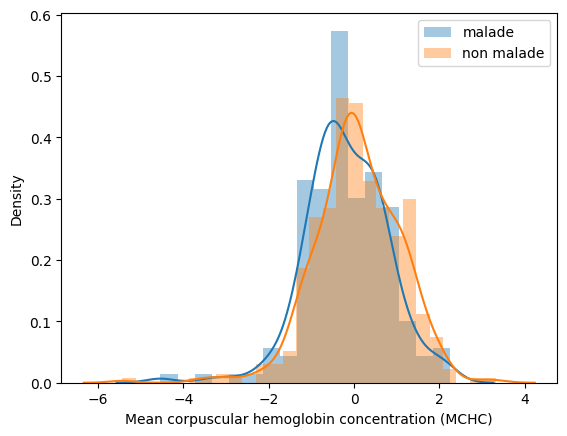

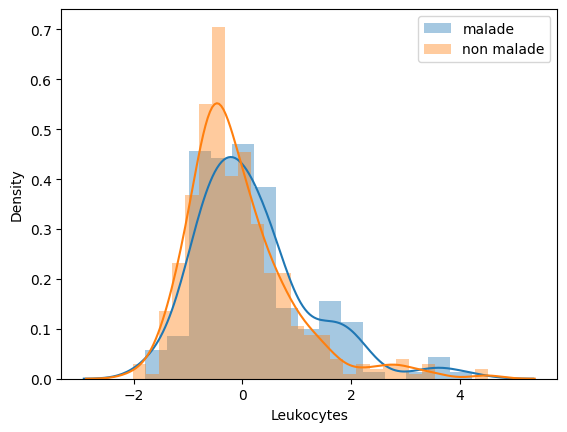

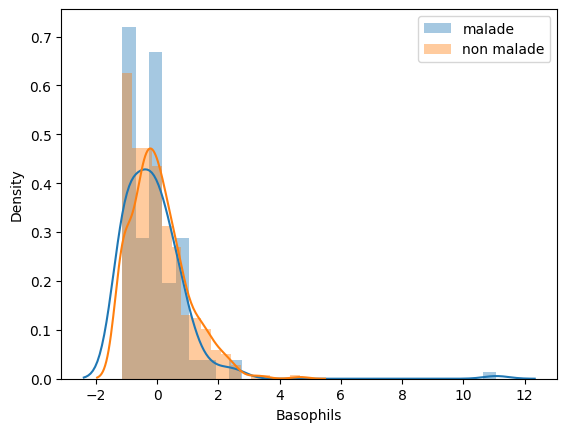

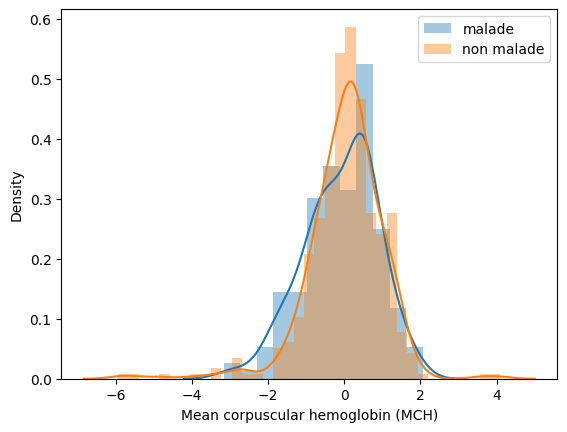

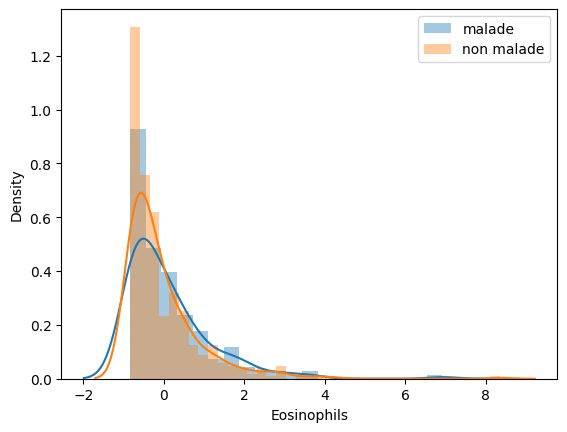

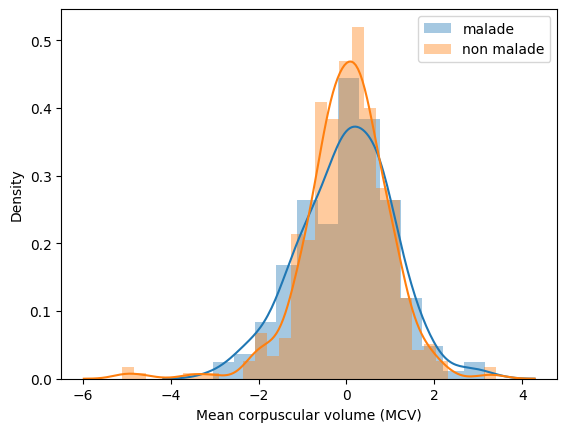

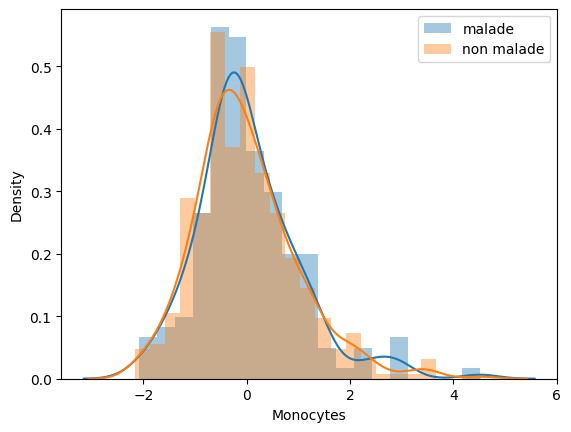

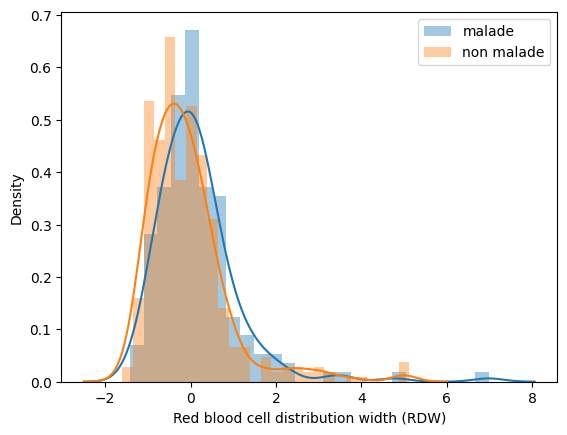

In [78]:
for col in blood_df:
  plt.figure()
  sns.distplot(malade_df[col], label='malade')
  sns.distplot(non_malade_df[col], label='non malade')
  plt.legend()


**Relation malade et Hospitalisation **

In [80]:
def hospitalisation(df):
  if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
    return 'surveillance'
  elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
    return 'soins semi-intensives'
  elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
    return 'soins intensives'
  else:
    return 'inconnu'

In [82]:
df['statut']=df.apply(hospitalisation, axis=1)
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  \
0              NaN              NaN              NaN                   NaN   
1     not_detected     not_detected     not_detected          not_detected   
2              NaN              NaN              NaN                   NaN   
3              NaN              NaN              NaN                   NaN   
4     not_detected     not_detected     not_detected          not_detected   

   Metapneumovirus  Parainfluenza 2  Influenza B, rapid test  \
0              NaN              NaN                      NaN   
1     not_detected     not_detected                 negative   
2              NaN              NaN                      NaN   
3              NaN              NaN                      NaN   
4     not_detected     not_detected                      NaN   

   Influenza A, rapid test  est malade   statut  
0                      NaN       False  inconnu  
1                 negative        True  inconnu  
2                      NaN       False  inconnu  
3                      NaN       False  inconnu  
4                      NaN        True  inconnu  

[5 rows x 40 columns]

<ipython-input-86-a7d6a4a93b69>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut']==cat][col], label=cat)
<ipython-input-86-a7d6a4a93b69>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut']==cat][col], label=cat)
<ipython-input-86-a7d6a4a93b69>:4: UserWarning: 

`distp

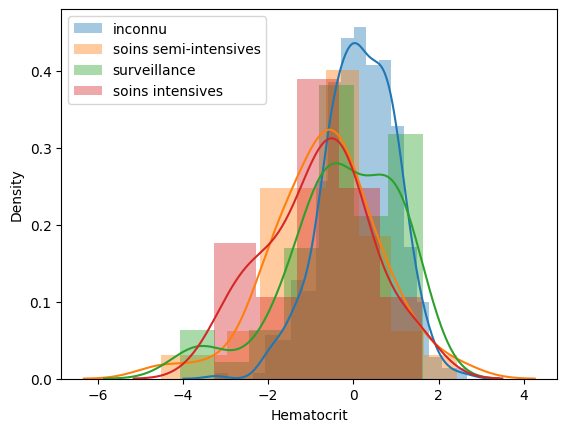

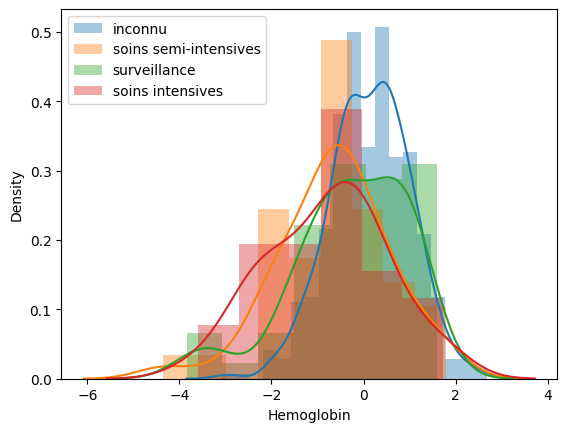

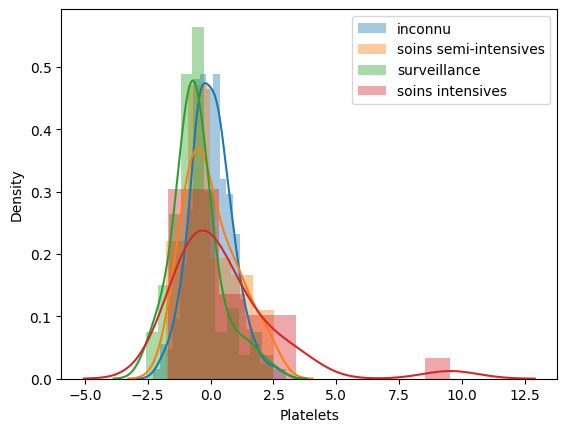

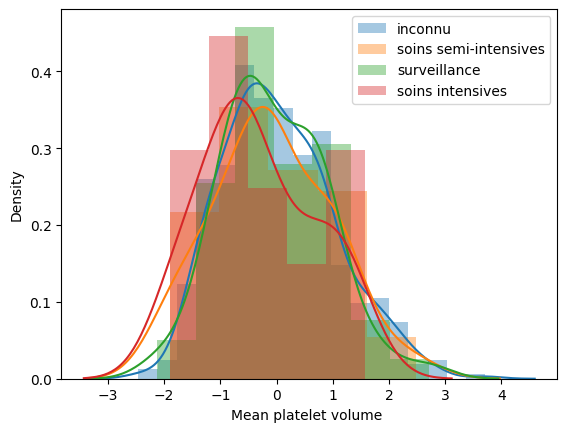

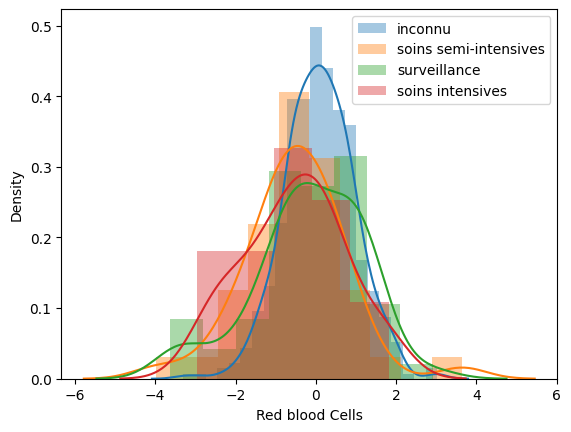

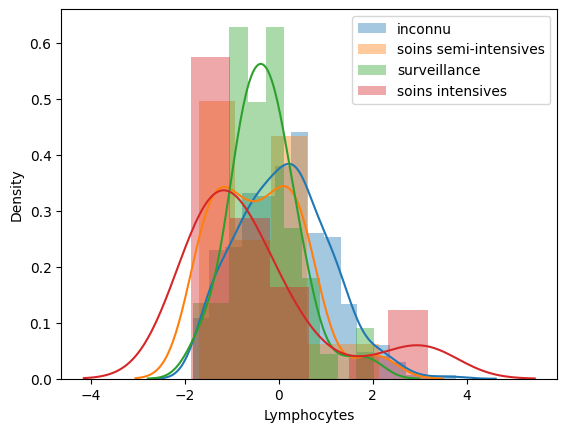

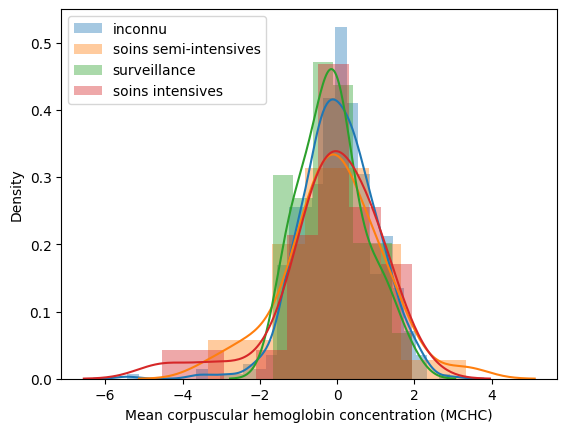

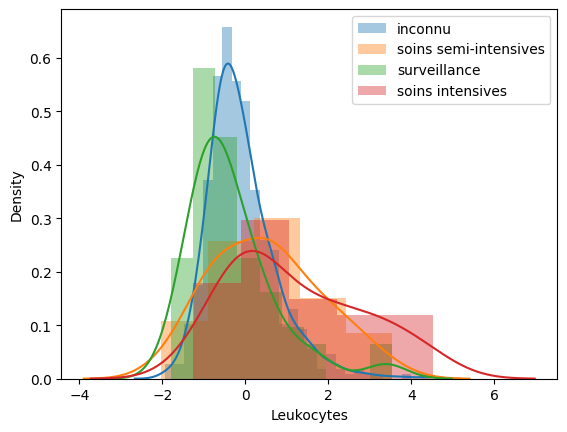

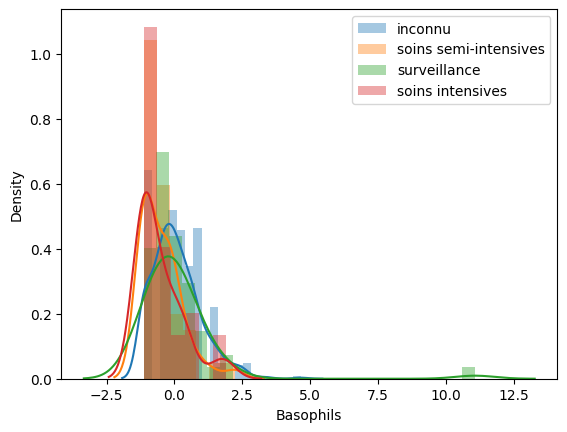

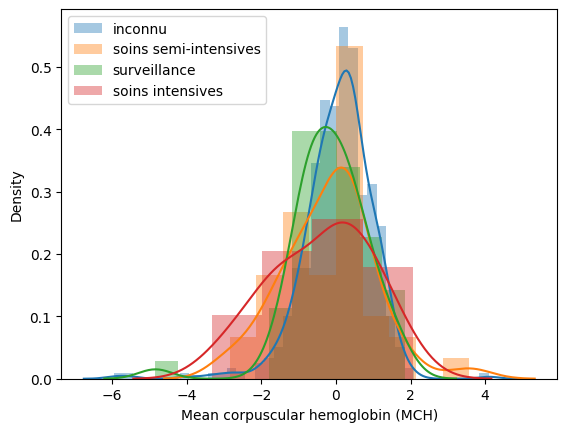

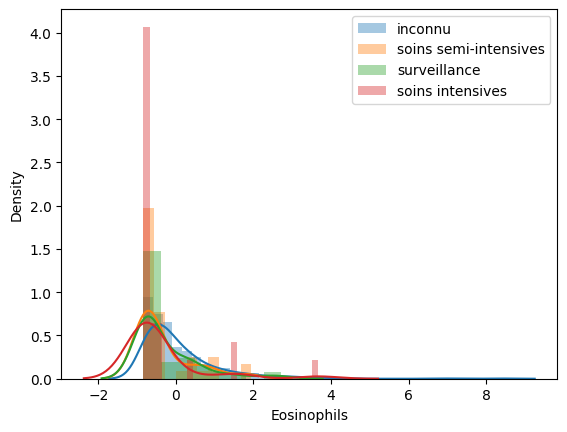

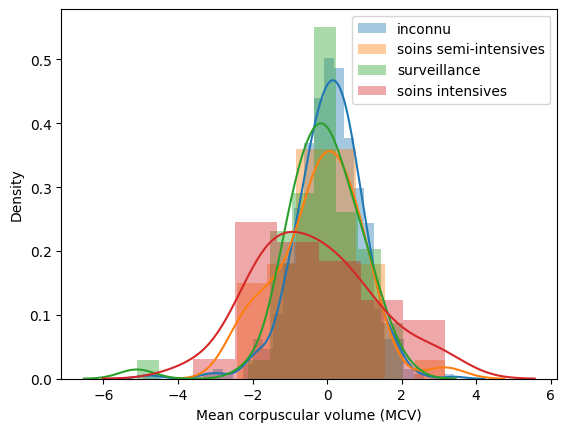

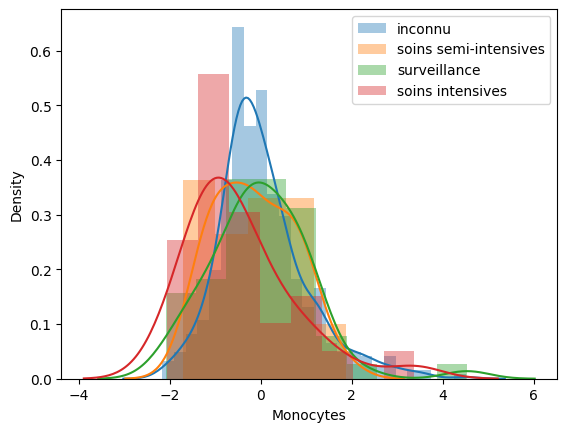

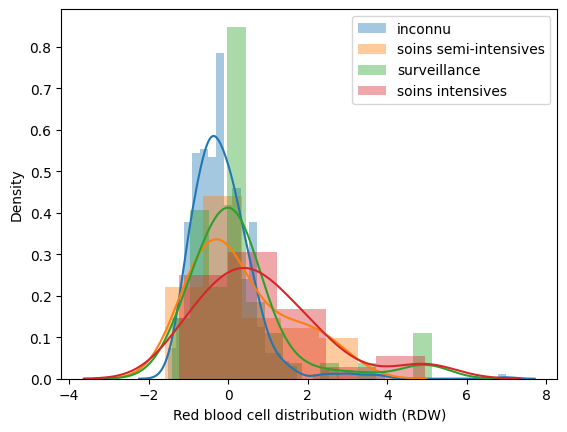

In [86]:
for col in blood_df:
  plt.figure()
  for cat in df['statut'].unique():
    sns.distplot(df[df['statut']==cat][col], label=cat)
  plt.legend()

**Analyse des NaN**

qu'est ce qui se passerait dans notre dataset si on élimine les données manquantes

In [92]:
df[blood_df].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [91]:
df[viral_df].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [90]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

# T-Test

il est préférable d'avoir des classes balancées

In [93]:
from scipy.stats import ttest_ind

In [95]:
positive_df.shape

(558, 38)

In [96]:
negative_df.shape

(5086, 38)

In [99]:
balanced_neg = negative_df.sample(positive_df.shape[0])

In [100]:
def t_test(col):
  alpha = 0.05
  stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
  if p < alpha:
    return 'H0 rejetée'
  else :
    return 0

In [102]:
for col in blood_df:
  print(f'{col:-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 rejetée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- H0 rejetée
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 rejetée
Red blood cell distribution width (RDW)----------- 0
